# <p style="background-color:orange;color:black;font-size:35px;text-align:center;border-radius:20px 20px;"> Bayesian Methods for Health Insurance Cost Analysis </p> <font size="20">

<p style="background-color:;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> Semester Project <span style='font-size:28px; background-color:blue ;'>  </span></p>

👨‍💻 **Onboarding**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


# <p style="background-color:goldenrod;color:black;font-size:30px;text-align:center;border-radius:10px 10px;"> Introduction </p> <font size="4">

### <font color='black'> **Problem Description** <font>

Medical insurance is vital for financial protection, but its cost, limited availability, and coverage pose significant challenges. To overcome these, developing a model for predicting insurance costs accurately can be helpful. 

Such a model can help individuals and businesses budget and plan accordingly, enable insurance companies to set fair premiums and remain competitive, and improve risk management strategies. However, frequentist approaches have limitations, such as reliance on assumptions about data distribution and lack of flexibility, interpretability, and predictive power. 

Alternative modeling approaches like Bayesian modeling or machine learning may offer additional benefits. Developing a model for predicting insurance costs is crucial in today's world, and alternative approaches can be considered to overcome the limitations of frequentist approaches.

In this project, we look at the Bayesian approach for modeling insurance prices using Markov Chain Monte Carlo (MCMC), Laplace Approximation and some computational techniques and fitting various Regression models with medical insurance data.



 ### <font color='black'> **Step-by-Step Procedure** <font>

<font color='darkblue'> In order to tackle efficiently this project, we will follow the steps below suggested by [A. Qua](https://www.kaggle.com/adibouayjan). <front>   
 
    I.	Explarotory data analysis
    
    I.1. General exploration

    I.2. Numerical features
        I.2.1. Explore and clean Numerical features
        I.2.2. Missing data of Numerical features

    I.3. Categorical features
        I.3.1. Explore and clean Categorical features
        I.3.2. Missing data of Categorical features
        I.3.3. Transform Categorical features into Binary features (get_dummies)

    I.4. Merge numerical and binary features into one data set
    
    I.5. Drop outliers from the train set

II.	Feature engineering

III.	Preparing data for modeling
    
    III.1. Split data into train and test and Standardization

    III.2. Backward Stepwise Regression

    III.3. Variance Inflation Factor

    III.4. Cook distance

IV.	Modeling

    * Frequentist Approach
    
    IV.1. Models and metrics selection

    IV.2. Hyperparameters tuning and model optimization
        IV.2.1. Ridge regression
        IV.2.2. Lasso regression
        IV.2.3. XGBoost regression
        IV.2.4. LightGBM regression

    IV.3. Choosing the best model
    
    * Bayesian Approach

    IV.4. MCMC for Linear Regression Models
    

# <p style="background-color:orange;color:black;font-size:30px;text-align:center;border-radius:10px 10px;"> Exploratory Data Analysis </p> <font size="4">

These are the core parts of this session, based on the work of [Pedro Marcelino, Ph.D.](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook): 
    
* Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
    
* Univariable study. We'll just focus on the dependent variable ('charges') and try to know a little bit more about it.
    
* Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
    
* Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
    
* Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.


### <font color='forestgreen'>  I.1. General Exploration <front>

#### 1.1. Loading libraries

In [2]:
import pandas as pd 

Pandas is a Python library for data analysis. Started by Wes McKinney in 2008 out of a need for a powerful and flexible quantitative analysis tool, pandas has grown into one of the most popular Python libraries. It has an extremely active community of contributors. 
Pandas features: 

* Times series Analysis
* Split-Apply-Combine
* Data visualisation
* Pivot Table
    
See [Pandas](https://mode.com/python-tutorial/libraries/pandas/) for more details. 

In [3]:
import matplotlib.pyplot as plt
from matplotlib import patches

Matplotlib is a python library used to create 2D graphs and plots by using python scripts. It has a module named pyplot which makes things easy for plotting by providing feature to control line styles, font properties, formatting axes etc. It supports a very wide variety of graphs and plots namely - histogram, bar charts, power spectra, error charts etc. 

See [Matplotlib](https://matplotlib.org) for more details. 

In [4]:
import seaborn as sns

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

See [Seaborn](https://seaborn.pydata.org) for more details. 

In [5]:
import numpy as np

NumPy brings the computational power of languages like C and Fortran to Python. With this power comes simplicity: a solution in NumPy is often clear and elegant.

See [NumPy](https://numpy.org) for more details. 

In [6]:
import warnings

Warnings are provided to warn the developer of situations that aren’t necessarily exceptions. Usually, a warning occurs when there is some obsolete of certain programming elements, such as keyword, function or class, etc. A warning in a program is distinct from an error. Python program terminates immediately if an error occurs. 

Conversely, a warning is not critical. It shows some message, but the program runs. The warn() function defined in the ‘warning‘ module is used to show warning messages. The warning module is actually a subclass of Exception which is a built-in class in Python. 

See [Warning](https://docs.python.org/3/library/warnings.html) for more details. 

In [7]:
import statsmodels.api as sm #Cross-sectional models and methods.
import statsmodels.formula.api as smf #A convenience interface for specifying models using formula strings and DataFrames.

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

See [Statsmodels](https://www.statsmodels.org/stable/index.html) for more details. 

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable, given by exog_idx is added to the linear regression. It is a measure for multicollinearity of the design matrix, exog.

One recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

In [9]:
import sklearn

Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.

See [Sckit-learn](https://www.tutorialspoint.com/scikit_learn/index.htm) for more details. 

In [10]:
# Function to deal with missing values via imputation
from sklearn.impute import SimpleImputer

In [11]:
# Function that converts categorical values into numerical values via ordinal encoding or one-hot encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [12]:
# Function to split data into different groups
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold


In [13]:
# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

SciPy is a scientific computation library that uses NumPy underneath. SciPy stands for Scientific Python. It provides more utility functions for optimization, stats and signal processing. Like NumPy, SciPy is open source so we can use it freely. SciPy was created by NumPy's creator Travis Olliphant.

See [SciPy](https://scipy.org) for further details. 

In [14]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (20, 15)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

#### 1.2. Loading the Data sets 

In [15]:
# Train set
df_train = pd.read_csv("/kaggle/input/insurance/insurance.csv")

# Printing the Training set
print(df_train)
 
# Checking the dimensions of this dataset
print(df_train.shape)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
(1338, 7)


In [16]:
# Using f-string 
print(f"Train set shape: {df_train.shape} \n")

Train set shape: (1338, 7) 



#### 1.3. Checking for missing data

In [17]:
# info of each of the variables in our train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No missing values detected. Nice! 👍

### <font color='forestgreen'>  I.2. Numerical Feature <front>

### <font color='darkblue'>I.2.1. Exploring and cleaning numerical features</font>

#### 1.2.1.1. Extracting Nnumerical features

The first address of this subsection is about isolating the culumns with numerical values from the whole training dataset. The lines of code underneath fulfill this task.  

In [18]:
df_train_num = df_train.select_dtypes(exclude=["object"])
df_train_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


Hence, we have 4 numerical independent variables all told in the training set. 

We can also use this alternative command leading to the same result. 

In [19]:
df_train_num = df_train.select_dtypes(include=[np.number])
df_train_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


#### 1.2.1.2. Features distribution

While there are a number of distributional assumptions in regression models, one distribution that has no assumptions is that of any predictor (i.e. independent) variables.

However, it is sometime useful to understand the distribution of predictor variables to find influential outliers or concentrated values. Then, a highly skewed independent variable may be made more symmetric with a transformation. Then, it makes sense to think of a predictor as random. 

This is called Type II regression or Major Axis regression.

So let's look at the distribution of our two samples at hand. 

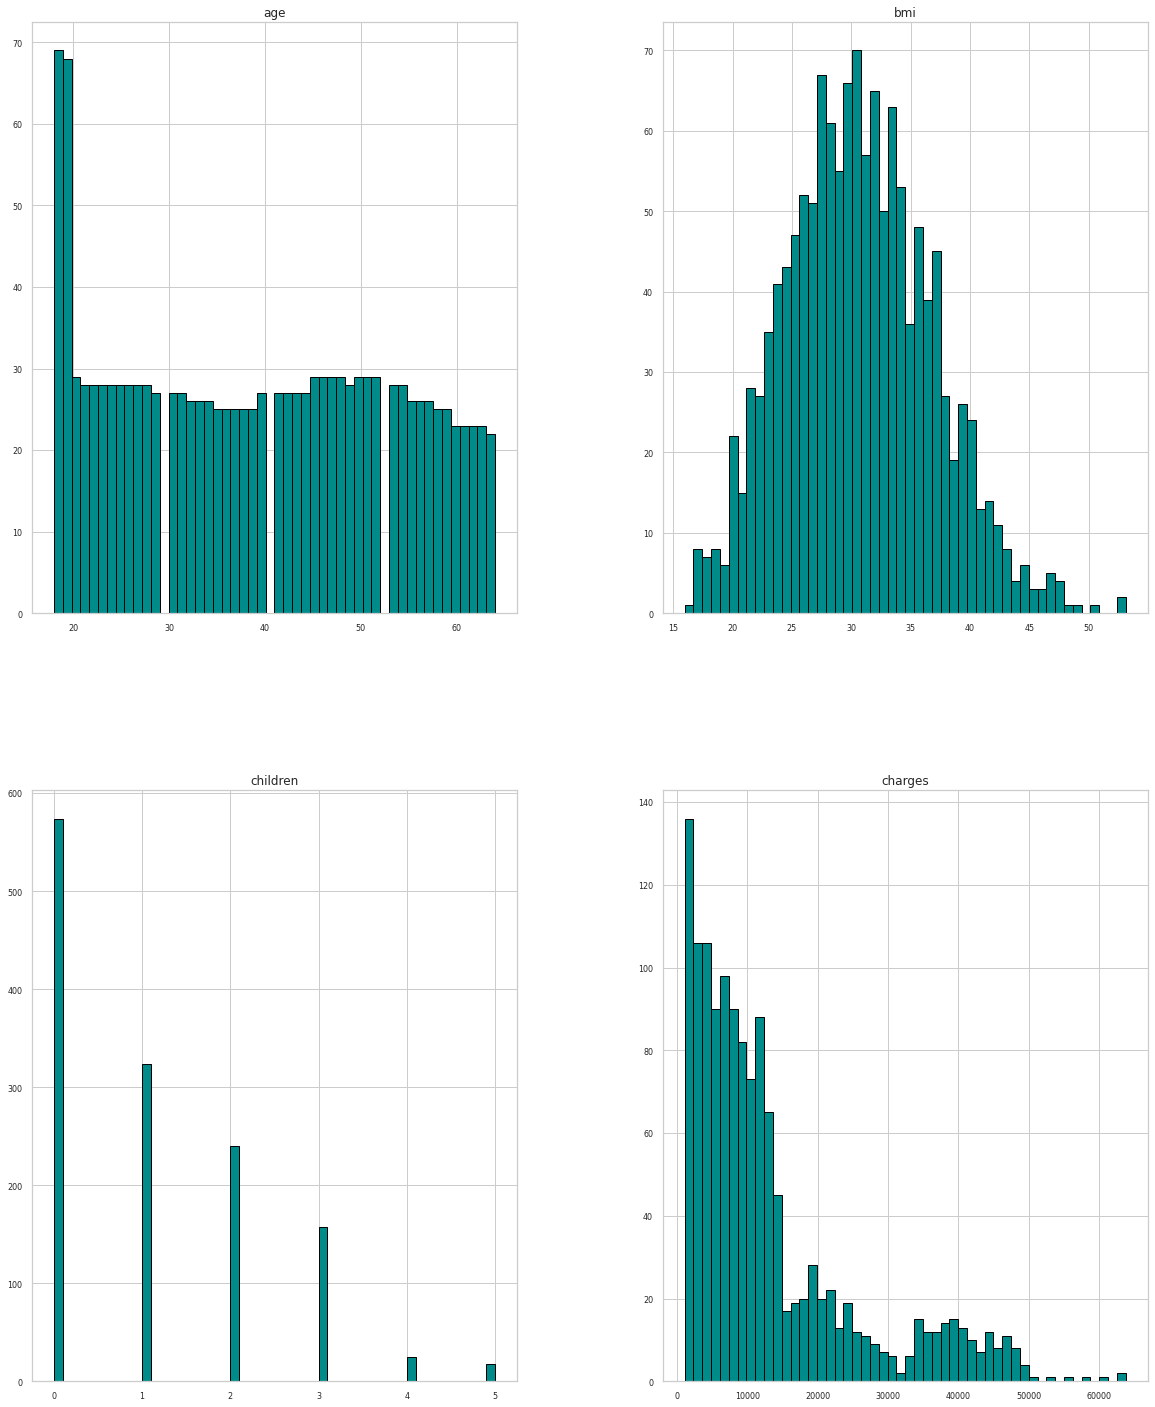

In [20]:
fig_ = df_train_num.hist(figsize=(20, 25), bins=50, color="darkcyan", edgecolor="black", xlabelsize=8, ylabelsize=8)

We can clearly see that de distribution of the insurance charges is strongly positively skewed while that of bmi is approximately symetrical.

#### 1.2.1.3. Quasi-Constant variables

From the latter window of distributions, it is clearly noticeable that some features have pervasive values. The models we are about to train won’t learn anything insightful by keeping this feature in training set. So we are better off dropping this feature.

Let's drop quasi-constant features where 95% of the values are similar or constant. Check out [sklearn.feature_selection.VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) for a better understanding of the process followed below. 

In [21]:
# Displaying a specific colunm
df_train_num[:]['children']
df_train_num[:]['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [22]:
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(df_train_num.iloc[:, :-1])


# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df_train_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_train_num.iloc[:, :-1].columns if x not in df_train_num.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

# Let's drop these columns from df_train_num
df_train_num.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 3

Number of quasi_constant features: 0

Quasi-constant features to be dropped: []


In [23]:
# Checking the dimensions of the set obtained
print(df_train_num.shape)

(1338, 4)


#### 1.2.1.4. Scatterplot

A straightforward and widely used vizualisation technique for accessing the relationship between two or more variables is the scatterplot. 

In fact, scatterplots show possible associations or relationships between two variables. However, just because your graph or chart shows something is going on, it doesn’t mean that a cause-and-effect relationship exists. So we better be careful with how we interpret the graphs obtained.  

Furthermore, a scatterplot can be used to assess the following features of your dataset:

* Check for outliers and unusual observations.
* Create a time series plot with irregular time-dependent data.
* Evaluate the fit of a regression model.

#### 1.2.1.4.1.  Relationship Assessment

In [24]:
# Extracting column names as a list
# cols = list (df_train_num.columns)
# cols

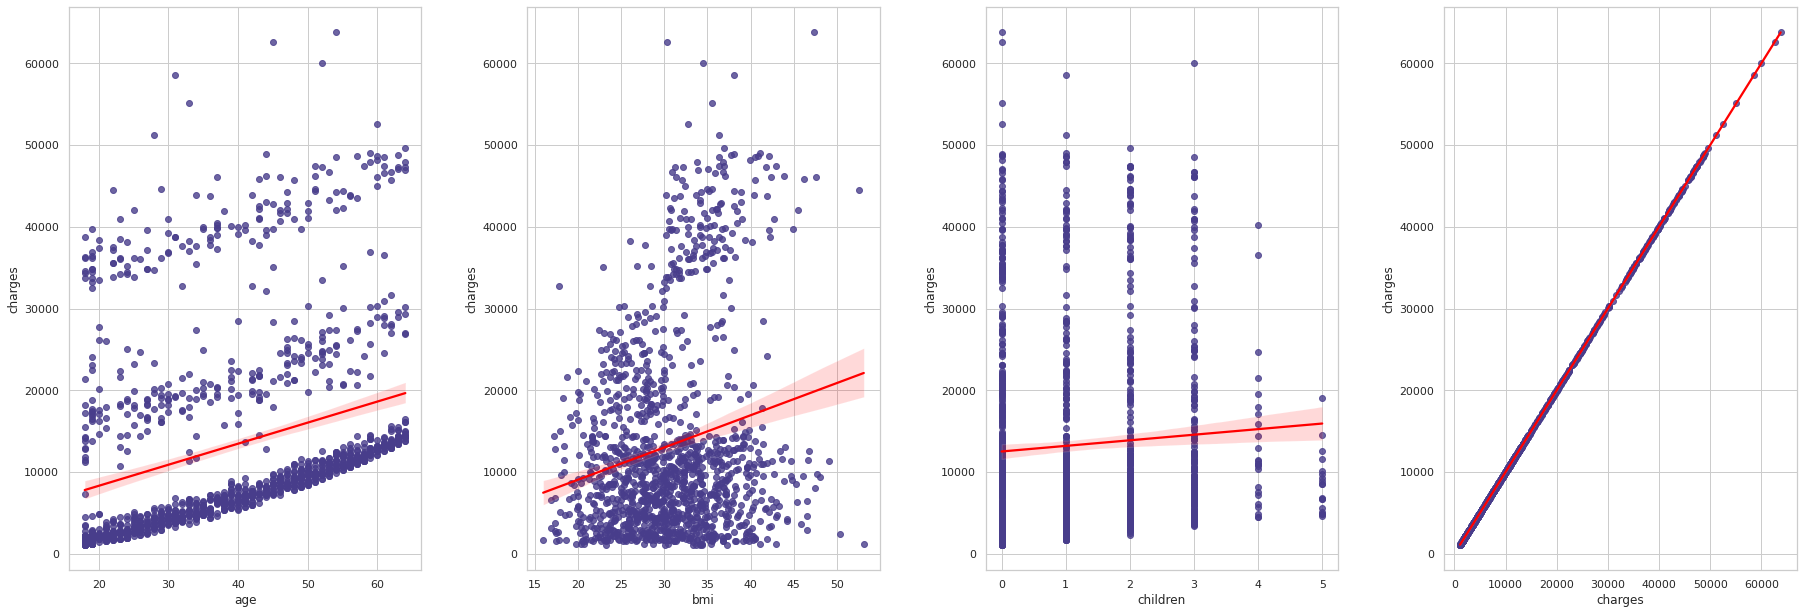

In [25]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_train_num.columns):
        plt.subplot(8,4,i+1)
        sns.regplot(x=col, y= "charges", data=df_train_num, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

#### Interpretation

##### Form and Direction


One pattern of special interest is a linear pattern, where the data has a general look of a line going uphill or downhill. The red line shown on each graph is the fitted line from a linear regression. 

A linear relationship between X and Y exists when the pattern of X and Y-values is heading alongside the red line, either uphill (with a positive slope or positive correlation) or downhill (with a negative slope or negative correlation).

So, looking at the preceding figure, we can see that a positive linear relationship appears between charges and the predictors. That is, as the value assigned to the predictor standing for the characteristics of the insurance contractor, the insurance charge increases as well. 

Note that the scatterplot only suggests a linear relationship between the two sets of values. It does not suggest that an increase in the insurance price is a consequence of an increase in the value of a given characteristic.

##### Strengh

Another important component to a scatterplot is the strength of the relationship between the two variables. The slope provides information on the strength of the relationship.

* The strongest linear relationship occurs when the slope is 1. This means that when one variable increases by one, the other variable also increases by the same amount. This line is at a 45 degree angle.

* The strength of the relationship between two variables is a crucial piece of information. Relying on the interpretation of a scatterplot is too subjective. More precise evidence is needed, and this evidence is obtained by computing a coefficient that measures the strength of the relationship under investigation.

#### 1.2.1.4.2. Correlation

A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. 

#### Pearson's Correlation

It is a powerful tool to summarize a large dataset and to gauge how far the independent variables are linearly related to the target variable. So let's check this out.

<AxesSubplot:>

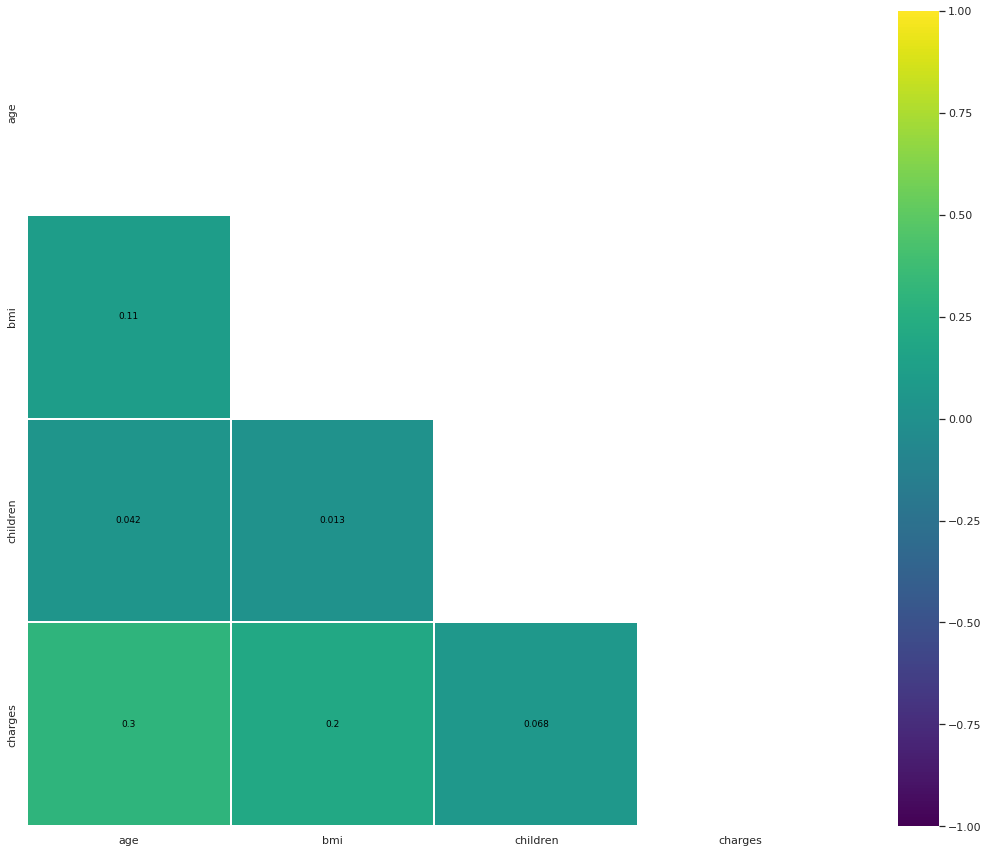

In [26]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix 
# (method = pearson: standard correlation coefficient)
corr_matrix = df_train_num.corr(method = 'pearson')

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.0005) & (corr_matrix > -0.0005)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

##### Strengh of relationship

* |r| < 0.3 $\Rightarrow$ None or Very Weak
* 0.3 < |r| < 0.5 $\Rightarrow$ Weak
* 0.5 < |r| < 0.7 $\Rightarrow$ Moderate
* |r| > 0.7 $\Rightarrow$ Strong

Correlation around 0.7 or above suggest a strong relationship and only one of the two variables is needed in the analysis. This need to be dealt with when adressing the features selection. 

Thus, we will look at two kinds of correlation: Those between the variable of interest and the predictors and those  within independent variables.

As a result, we can deduce that there is a very weak linear relationship between insurance charges, our target variable and the predictors cited in a descent order: 


* Age of primary beneficiary
* Body Mass Index
* Number of children covered by health insurance / Number of dependents

Let's keep all of them since we don't have lots of numerical features.


In [27]:
df_num_corr = df_train_num.corr()["charges"][:-1]

######################################
# Correlated features (0.1 < r2)
weak_features_list = df_num_corr[(abs(df_num_corr) > 0.0005)].sort_values(ascending=False)
print(f"{len(weak_features_list)} Weakly correlated predictors with charges kept:\n{weak_features_list}")

# Features with low correlation (between 0.3 and 0.5)
weak_features = df_num_corr[(abs(df_num_corr) >= 0.0005)].index.tolist()
weak_features.append("charges")

df_weak_features = df_train_num.loc[:, weak_features]

3 Weakly correlated predictors with charges kept:
age        0.30
bmi        0.20
children   0.07
Name: charges, dtype: float64


Let's see what our training set looks like now.

In [28]:
# Define the list of numerical fetaures to keep
list_of_numerical_features = weak_features[:] 

# Let's select these features form our train set
df_train_num = df_train_num.loc[:, list_of_numerical_features]

df_train_num.head()

,age,bmi,children,charges
0,19,27.90,0,"16,884.92"
1,18,33.77,1,"1,725.55"
2,28,33.00,3,"4,449.46"
3,33,22.70,0,"21,984.47"
4,32,28.88,0,"3,866.86"


#### Rank Correlation

In statistics, a rank correlation is any of several statistics that measure an ordinal association—the relationship between rankings of different ordinal variables or different rankings of the same variable, where a "ranking" is the assignment of the ordering labels "first", "second", "third", etc. to different observations of a particular variable. A rank correlation coefficient measures the degree of similarity between two rankings, and can be used to assess the significance of the relation between them. 

Some of the more popular rank correlation statistics include :

* Kendall's $\tau$
* Spearman's $\tau$  

[Source: Wikipedia](https://en.wikipedia.org/wiki/Rank_correlation#General_correlation_coefficient)

In this case, they can't be applied since we are dealing with numerical variables. 

#### 1.2.1.4.3. Outliers

The correlation coefficient is based on means and standard deviations, so it is not robust to outliers; it is strongly affected by extreme observations. These
individuals are sometimes referred to as influential observations because they have a strong impact on the correlation coefficient.

As a result, when included in the analysis, it can reduces a strong relationship to a moderate relationship. This case makes such a big difference when the dataset contains a very small number of individuals. As a general rule, as the size of the sample increases, the influence of extreme observations decreases.

When describing the relationship between two variables, correlations are just one piece of the puzzle. This information is necessary, but not sufficient. Therefore, other analyses should also be conducted to provide more information.

[Source: Scatterplots and Correlation](https://drive.google.com/file/d/1N8_AUDO2bo16qFHEEqYmBjLpRiU2C8i8/view?usp=sharing)

Like box plots, scatterplots visualize outlying observations very well but do not identify or mark them for easy treatment. For instance, backing to our scatterplots, we can clearly see that some obersations are lying very far away from the line of statistical relationship regarding variables such as "LotFrontage", YearBuit", "GarageArea", etc. But how far can we consider them as extreme obeservations, specially in a multidimensional fashion?

Consequently, when dealing with multivariate outliers, distance metrics can be helpful for detection. With distance metrics, the distance between two vectors is determined. These two vectors can be two different observations (rows) or an observation (row) compared to the mean vector (row of means of all columns). Distance metrics can be calculated independently of the number of variables in the dataset (columns).

[Source: Detecting And Treating Outliers In Python — Part 2](https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33)

#### 1.2.1.4.3.1. Bivariate Outliers detection Using Mahalanobis Distance

Mahalanobis Distance (MD) is an effective distance metric that finds the distance between the point and the distribution. It works quite effectively on multivariate data because it uses a covariance matrix of variables to find the distance between data points and the center. This means that MD detects outliers based on the distribution pattern of data points, unlike the Euclidean distance. 

[Source: Multivariate Outlier Detection in Python](https://towardsdatascience.com/multivariate-outlier-detection-in-python-e946cfc843b3)

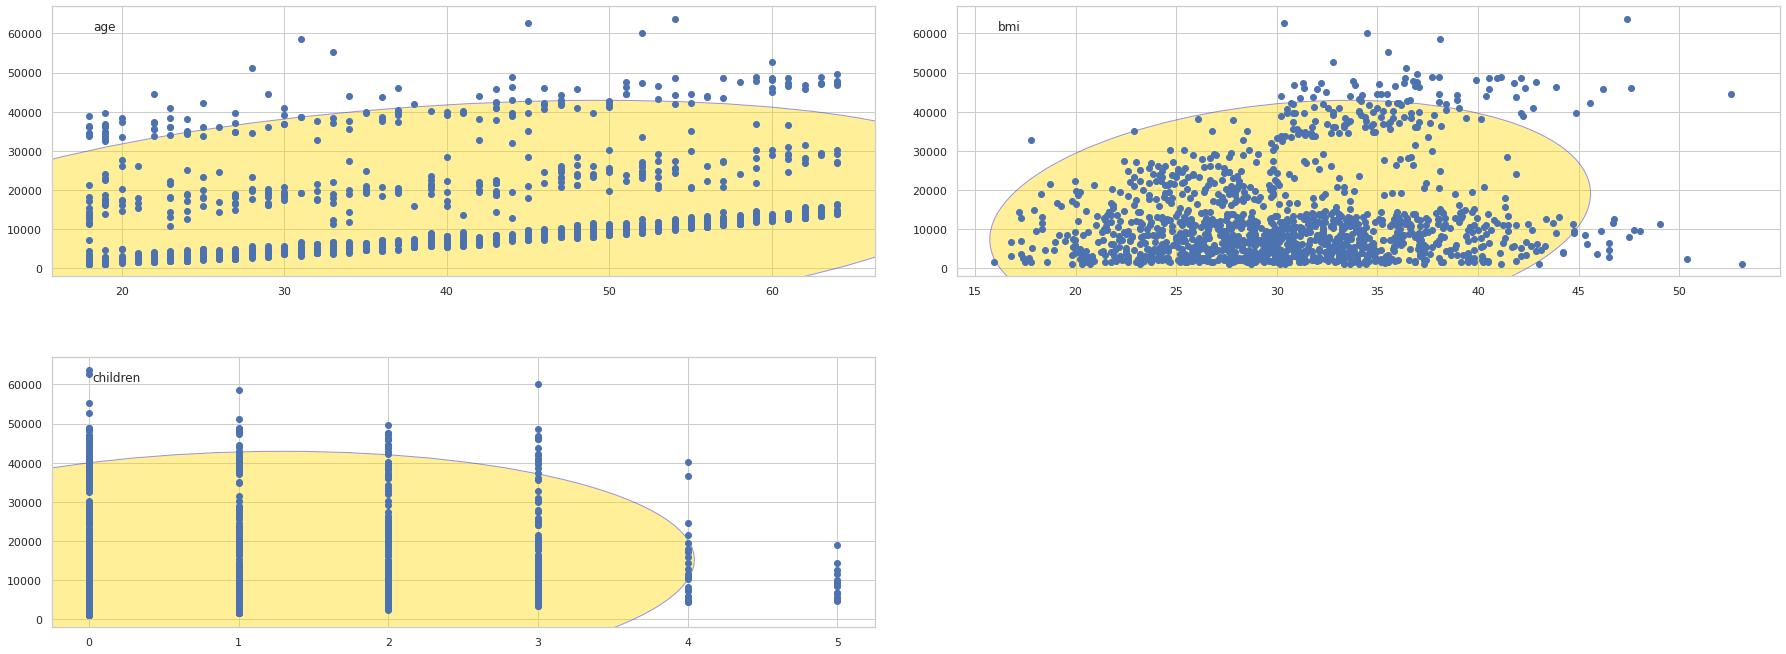

In [29]:
fig = plt.figure(figsize=(30,40))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.1,
                    hspace=0.3) 
for i, col in enumerate(df_train_num.iloc[:, :-1].columns):
    df = df_train_num[[col, 'charges']]
    df = df.dropna()
    df = df.to_numpy()

    # Covariance matrix
    covariance  = np.cov(df , rowvar=False)

    # Covariance matrix power of -1
    covariance_pm1 = np.linalg.matrix_power(covariance, -1)

    # Center point
    centerpoint = np.mean(df , axis=0)

    # Distances between center point and 
    distances = []
    for j, val in enumerate(df):
            p1 = val
            p2 = centerpoint
            distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
            distances.append(distance)
    distances = np.array(distances)

    # Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
    cutoff = chi2.ppf(0.95, df.shape[1])

    # Index of outliers
    outlierIndexes = np.where(distances > cutoff )

    #print('--- Index of Outliers ----')
    #print(outlierIndexes)

    #print('--- Observations found as outlier -----')
    #print(df[ distances > cutoff , :])

    ## Finding ellipse dimensions 
    pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    lambda_, v = np.linalg.eig(covariance)
    lambda_ = np.sqrt(lambda_)
    
    # Ellipse patch   
    ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='blue')
    ellipse.set_facecolor('gold')
    ellipse.set_alpha(0.4)
    ax = plt.subplot(15, 2, i+1)
    ax.add_artist(ellipse)
    #ellipse.set_hatch('+')
    plt.scatter(df[: , 0], df[ : , 1])
    ax.text(.05, .95, col , transform=ax.transAxes, ha="left", va="top")

As we can see on the graphs obtained above, the points outside the ellipse are detected as outliers. This ellipse represents the area that wraps non-outlier values according to Mahalanobis Distance.

We will drop these outliers in the next subsection addressing that specially.

#### 1.2.1.4.3.2. Handling Outliers

Below are some of the methods of treating the outliers:

* Trimming/removing the outlier 
* Quantile based flooring and capping
* Mean/Median imputation

[Source: Detecting and Treating Outliers | Treating the odd one out!](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)

For lack of relevant arguments to support the reliability of this techniques, we will move on to the next steps, bearing in mind that some analysis need to be done here.

### <font color='darkblue'>I.2.2. Missing data of Numerical features </font>

This subsection is intended to treat missing values among numerical features. But there is no missing values. So we are good! 

### <font color='forestgreen'>  I.3. Categorical features <front>

### <font color='darkblue'>I.3.1. Explore and clean Categorical features</font>

This section will focus on categorical features in our pool explanatory variables. The first step will consist of separating thos features of interest from both data sets and then processing them. 

#### 1.3.1.1. Extracting Categorical Features

In [30]:
# Categorical to Quantitative relationship
categorical_features = [i for i in df_train.columns if df_train.dtypes[i] == "object"]
categorical_features.append("charges")

# Train set
df_train_categ = df_train[categorical_features]

In [31]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")

Training set shape (Categorical features): (1338, 4)



As displayed, we have 3 categorical varaibles in the training data set.

The next setp now is to look at the Countplot for each of the categorical features in the training set in order to determine which categorical features are dominated by one outcome. This method is used to show the counts of observations in each categorical feature using bars.

#### 1.3.1.2. Counter Plots

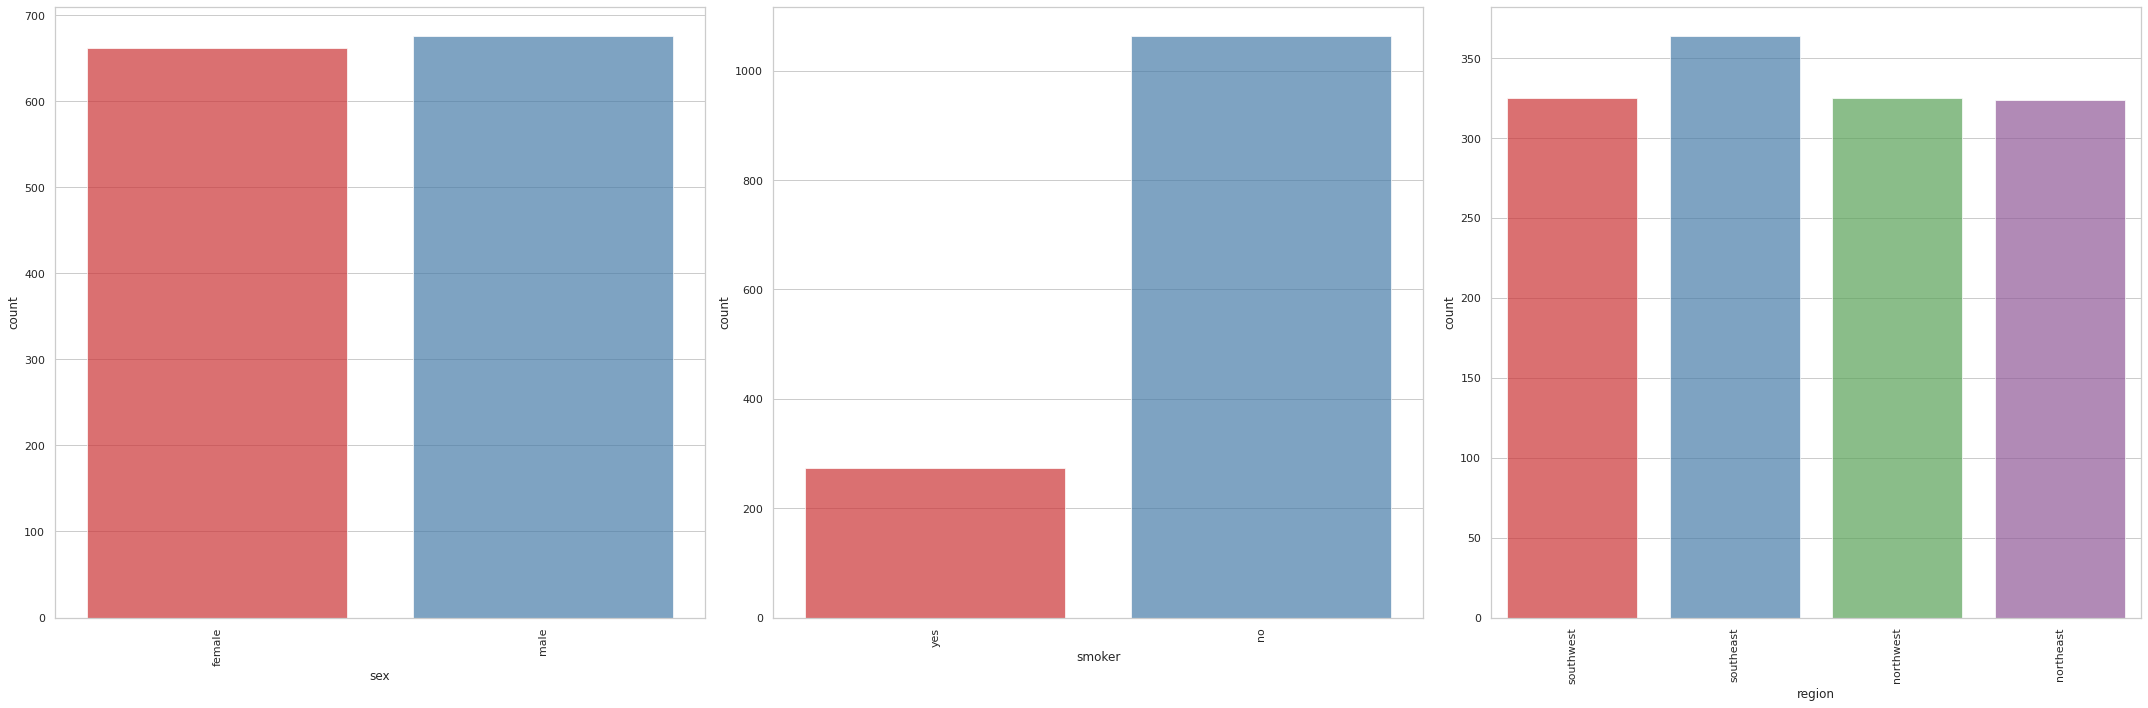

In [32]:
fig, axes = plt.subplots(round(len(df_train_categ.columns) / 4), 3, figsize=(30, 10))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_train_categ.columns[i], alpha=0.7, data=df_train_categ, ax=ax, palette = "Set1")

fig.tight_layout()

A count plot can be thought of as a histogram across a categorical, instead of quantitative variable. As a result, we don't want those predictors with a prevalent outcome such as smoker for instance because they don't contribute significantly to training our model. It's quite similar to the issue of quasi-constant variable we dealed with regarding numerical feature.  

[Source: seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

Secondly, it's worth a look at the variation of the target variable with respect to each categorical feature.

#### 1.3.1.3. Box Plots 

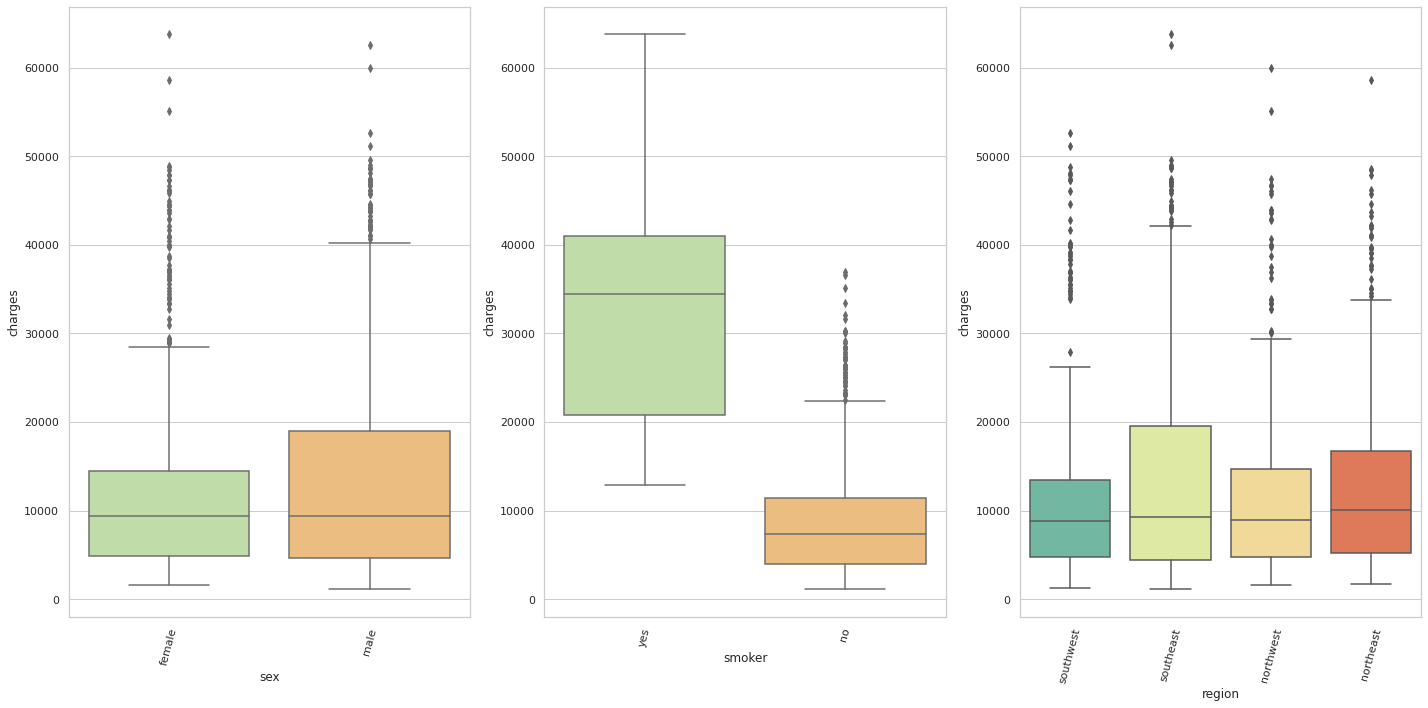

In [33]:
fig, axes = plt.subplots(
    round(len(df_train_categ.columns)/3), 3, figsize= (20, 10))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_train_categ.columns[i], y="charges", data=df_train_categ, ax=ax, palette="Spectral_r")

fig.tight_layout()

In [34]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")

Training set shape (Categorical features): (1338, 4)



Eventually, we have 25 categorical features in our pool now. About a half of what we had initially has been dropped by conducting this cleaning operation.  

### <font color='darkblue'>I.3.2. Missing data of Categorical features</font>

No missing values! Great! 👍

### <font color='darkblue'>I.3.3. Transform Categorical features into Binary features</font>

Before combining the categorical data with the numerical data obtained after cleansing, we need to transform the categorical entries into numerical entries. This will be done using the get_dummies() function where each categorical feature will be transformed into a binary feature.

In [35]:
# Drop the SalePrice column from the training dataset
df_train_categ.drop(["charges"], axis = 1, inplace = True)

# Use get_dummies to transform the Categorical features into Binary features (Training dataset)
df_train_dummies = pd.get_dummies(df_train_categ)

#  drop one of the dummy variables
df_train_dummies = df_train_dummies.drop('region_northeast', axis=1) 
df_train_dummies = df_train_dummies.drop('smoker_no', axis=1)
df_train_dummies = df_train_dummies.drop('sex_female', axis=1) 


# Display the data
df_train_dummies.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [36]:
print(f"Training set shape (Categorical features): {df_train_dummies.shape}\n")

Training set shape (Categorical features): (1338, 5)



### <font color='forestgreen'>I.4. Merge numerical and binary features into one data set</font>

This short part aims to join numerical and categorical datasets together before priming the modeling. 

In [37]:
# Training set
df_train_new = pd.concat([df_train_num, df_train_dummies], axis = 1)
print(f"Train set: {df_train_new.shape}")

df_train_new

charges = df_train_new['charges']

Train set: (1338, 9)


# <p style="background-color:orange;color:black;font-size:30px;text-align:center;border-radius:10px 10px;"> Feature Engineering </p> <font size="4">

Now, we consider the continuous numerical variables that are skewed. A Log transformation will be applied to the skewed numerical variables to help mitigate the strong variation of some variables, and to reduce redundancy. The continuous features are defined below.

In [38]:
continuous_features = ["bmi", "age", "children"]
df_skew_verify = df_train_new.loc[:, continuous_features]
df_skew_verify.head()

,bmi,age,children
0,27.90,19,0
1,33.77,18,1
2,33.00,28,3
3,22.70,33,0
4,28.88,32,0


To obtain the skewed features, we take out variables that are more than 50% skewed.

In [39]:
df_skew_verify = df_train_new.loc[:, continuous_features]

# Select features with absolute Skew higher than 0.5
skew_ft = []

for i in continuous_features:
    # list of skew for each corresponding feature
    skew_ft.append(abs(df_skew_verify[i].skew()))

df_skewed = pd.DataFrame({"Columns": continuous_features, "Abs_Skew": skew_ft})


sk_features = df_skewed[df_skewed["Abs_Skew"] > 0.5]["Columns"].tolist()
print(f"List of skewed features: {sk_features}")

List of skewed features: ['children']


A log transformation can now be applied to the skewed features listed above.

In [40]:
# Log transformation of the skewed features
#for i in sk_features:
    # loop over i (features) to calculate Log of surfaces
    # Training set
 #   df_train_new[i] = np.log((df_train_new[i])+1)

Looking at the distribution of the numerical features right from the begining, we can notice that "charges" is skewed as well. To help normalize this variable, a log transformation will be applied to "charges" as well.

In [41]:
# Log transformation of the target variable "charges"
df_train_new["chargeslog"] = np.log(df_train_new.charges)

# Drop the original "charges"
df_train_new.drop(["charges"], axis=1, inplace=True)

In [42]:
# Display the final dataset
df_train_new['children']

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64

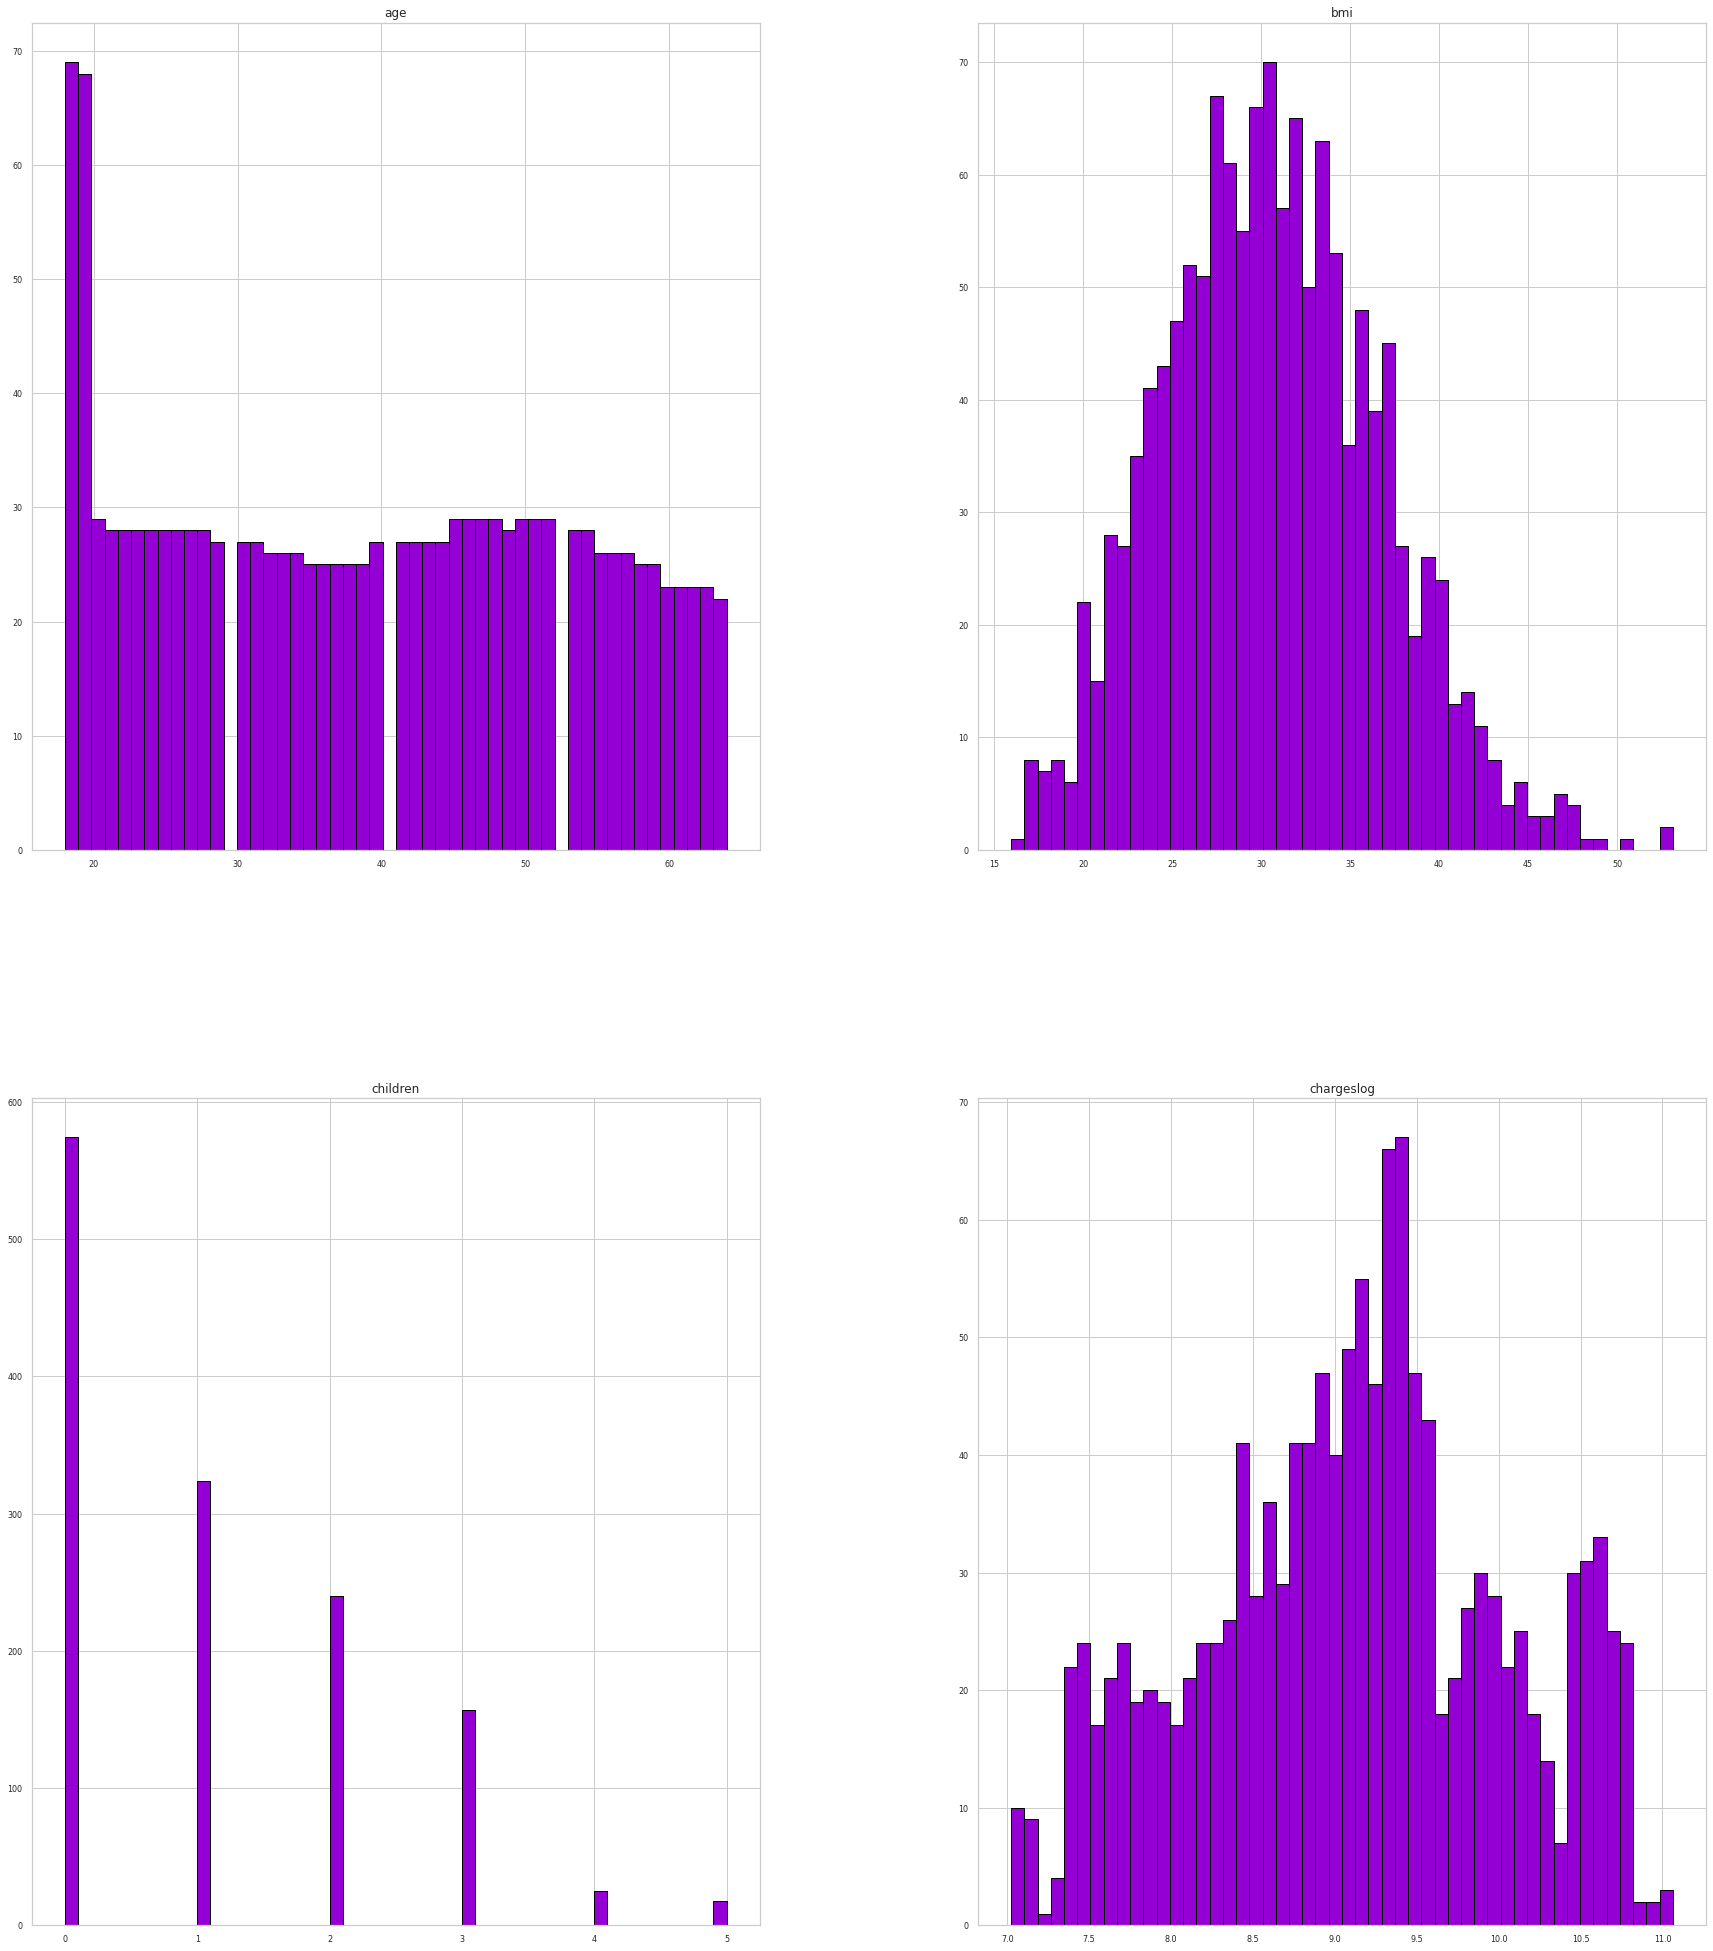

In [43]:
numerical_cols_new = [cname for cname in df_train_new.columns if 
                      df_train_new[cname].dtype in ['int64', 'float64']]

df_train_new_num = df_train_new[numerical_cols_new].copy()

# Plot the distribution of all the numerical features
fig_ = df_train_new_num.hist(figsize=(30, 35), bins=50, color="darkviolet",
                               edgecolor="black", xlabelsize=8, ylabelsize=8)

Looking at the distribution of the numerical features, we notice that most of the previously skewed variables have a more normal distribution except Age and Children, which should result in better predictons.

# <p style="background-color:orange;color:black;font-size:30px;text-align:center;border-radius:10px 10px;"> Preparing Data for Modeling </p> <font size="4">

We cannot fit and evaluate machine learning algorithms on raw data; instead, we must transform the data to meet the requirements of individual machine learning algorithms. More than that, we must choose a representation for the data that best exposes the unknown underlying structure of the prediction problem to the learning algorithms in order to get the best performance given our available resources on this predictive modeling project.

To achieve this goal, we will follow the steps below:

### <font color='forestgreen'>III.1. Split data into train and test set and Standardization

In [44]:
# Extract the features (X) and the target (y)
# Features (X)
X = df_train_new[[i for i in list(
    df_train_new.columns) if i != "chargeslog"]]
print(X.shape)

# Target (y)
y = df_train_new.loc[:, "chargeslog"]
print(y.shape)

X,y

(1338, 8)
(1338,)


(      age   bmi  children  sex_male  smoker_yes  region_northwest  \
 0      19 27.90         0         0           1                 0   
 1      18 33.77         1         1           0                 0   
 2      28 33.00         3         1           0                 0   
 3      33 22.70         0         1           0                 1   
 4      32 28.88         0         1           0                 1   
 ...   ...   ...       ...       ...         ...               ...   
 1333   50 30.97         3         1           0                 1   
 1334   18 31.92         0         0           0                 0   
 1335   18 36.85         0         0           0                 0   
 1336   21 25.80         0         0           0                 0   
 1337   61 29.07         0         0           1                 1   
 
       region_southeast  region_southwest  
 0                    0                 1  
 1                    1                 0  
 2                    1   

In [45]:
# Split into X_train and X_test (by stratifying on y)
# Stratify on a continuous variable by splitting it in bins
# Create the bins.
bins = np.linspace(0, len(y), 150)
y_binned = np.digitize(y, bins)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y_binned, shuffle=True)
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train, X_test, y_train, y_test

X_train:(1070, 8)
y_train:(1070,)

X_test:(268, 8)
y_test:(268,)


(      age   bmi  children  sex_male  smoker_yes  region_northwest  \
 167    32 33.16         3         0           0                 1   
 10     25 26.22         0         1           0                 0   
 961    29 25.90         0         0           0                 0   
 1300   45 30.36         0         1           1                 0   
 36     62 32.97         3         0           0                 1   
 ...   ...   ...       ...       ...         ...               ...   
 672    36 29.70         0         1           0                 0   
 308    58 34.87         0         1           0                 0   
 314    27 31.40         0         0           1                 0   
 615    47 36.63         1         0           1                 0   
 884    25 26.70         4         1           0                 1   
 
       region_southeast  region_southwest  
 167                  0                 0  
 10                   0                 0  
 961                  0   

In [46]:
from sklearn import preprocessing

## Non-Standardized data
X_train0 = X_train
X_test0 = X_test
y_train0 = y_train
y_test0 = y_test

# Standardize the data
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

# The output of standardization is a vector. Let's turn it into a table
# Convert X, y into dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index().drop("index", axis=1)

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index().drop("index", axis=1)

X_train0, X_test0, y_train0, y_test0

(      age   bmi  children  sex_male  smoker_yes  region_northwest  \
 167    32 33.16         3         0           0                 1   
 10     25 26.22         0         1           0                 0   
 961    29 25.90         0         0           0                 0   
 1300   45 30.36         0         1           1                 0   
 36     62 32.97         3         0           0                 1   
 ...   ...   ...       ...       ...         ...               ...   
 672    36 29.70         0         1           0                 0   
 308    58 34.87         0         1           0                 0   
 314    27 31.40         0         0           1                 0   
 615    47 36.63         1         0           1                 0   
 884    25 26.70         4         1           0                 1   
 
       region_southeast  region_southwest  
 167                  0                 0  
 10                   0                 0  
 961                  0   

### <font color='forestgreen'>III.2. Backward Stepwise Regression<font>

Backward Stepwise Regression is a stepwise regression approach that begins with a full (saturated) model and at each step gradually eliminates variables from the regression model to find a reduced model that best explains the data. Also known as Backward Elimination regression.

In [47]:
Selected_Features = []


def backward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_in -- pvalue threshold of features to keep
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X_train, y_train)


Selected Features:
['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


In [48]:
# Keep the selected features only
X_train = X_train.loc[:, Selected_Features[0]]
X_test = X_test.loc[:, Selected_Features[0]]

### <font color='forestgreen'>III.3. Variance Inflation Factor (VIF) <font>

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

A feature with a VIF higher than 10 implies (5 is also common) that there is a multi-collinearity with the latter.

In [49]:
# Here I calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]

# VIF results in a table
vif["features"] = X_train.columns
vif.round(1)

,VIF Factor,features
0,1.00,age
1,1.10,bmi
2,1.00,children
3,1.00,sex_male
4,1.00,smoker_yes
5,1.60,region_northwest
6,1.70,region_southeast
7,1.60,region_southwest


In [50]:
# Select features with high VIF
high_vif_list = vif[vif["VIF Factor"] > 5]["features"].tolist()

if len(high_vif_list) == 0:
    # print empty list if low multicolinearity
    print(f"None of the features have a high multicollinearity")
else:
    # print list of features with high multicolinearity
    print(f"List of features with high multicollinearity: {high_vif_list}")

None of the features have a high multicollinearity


### <font color='forestgreen'>III.4. Cook distance<font>

By calculating Cook distance we can detect influential observations in a regression model. Cook distance detects data with large residuals (outliers) that can distort the prediction and the accuracy of a regression.

In [51]:
X_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_constant)
lr = model.fit()

# Cook distance
np.set_printoptions(suppress=True)

# Create an instance of influence
influence = lr.get_influence()

# Get Cook's distance for each observation
cooks = influence.cooks_distance

# Result as a dataframe
cook_df = pd.DataFrame({"Cook_Distance": cooks[0], "p_value": cooks[1]})
cook_df.head()

,Cook_Distance,p_value
0,0.00,1.00
1,0.00,1.00
2,0.00,1.00
3,0.00,1.00
4,0.00,1.00


In [52]:
# Remove the influential observation from X_train and y_train
influent_observation = cook_df[cook_df["p_value"] < 0.05].index.tolist()
print(f"Influential observations dropped: {influent_observation}")

# Drop these obsrevations
X_train = X_train.drop(X_train.index[influent_observation])
y_train = y_train.drop(y_train.index[influent_observation])

Influential observations dropped: []


No influencial observation detected based on Cook distance. 

# <p style="background-color:orange;color:black;font-size:30px;text-align:center;border-radius:10px 10px;"> Regression Models </p> <font size="4">

### Outlines

For this section, six supervised learning models will be considered:

* Linear Regression
* Ridge Regression
* Lasso Regression
* Decision Tree Regressor
* Random Forest Regressor
* XGBoost Regressor

To measure model performance and their predicitons the RMSE and R^{2} scores will be used, and 5-fold cross-validation will also be used.

### Importing Libraries

In [53]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score


### Defining Models

In [54]:
model_lin = LinearRegression()
model_ridge = Ridge(alpha = 0.001)
model_lasso = Lasso(alpha = 0.001)
model_tree = DecisionTreeRegressor()
model_ran = RandomForestRegressor()
model_xg = XGBRegressor()

### Defining Performance Metrics

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

# Define a function for each metric
# R²
def rsqr_score(test, pred):
    """Calculate R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred, model):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"**** Regressor: {model} ****")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

### <font color='forestgreen'>IV.1. Linear Regression <font>

In [56]:
scores_lin = cross_val_score(model_lin, X_train, y_train,cv=5)

print("Mean scores (Linear Model):\n", np.mean(scores_lin))
print("Standard deviation of scores (Linear Model):\n", np.std(scores_lin))

Mean scores (Linear Model):
 0.7475463577440898
Standard deviation of scores (Linear Model):
 0.03221147695139641


In [57]:
scores_lin

array([0.77200493, 0.73757632, 0.68969821, 0.75913069, 0.77932164])

In [58]:
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)
print_score(y_test, y_pred_lin, "Linear")

print("Intercept:\n", model_lin.intercept_)
print("Coefficients:\n", model_lin.coef_)
coef_with_intercept = np.append(model_lin.intercept_, model_lin.coef_)
print("Coefficients with intercept:\n", coef_with_intercept)

**** Regressor: Linear ****
R²: 0.8116590116519818
RMSE: 0.4101068580608348

Intercept:
 [9.09830139]
Coefficients:
 [[ 0.47102567  0.08317904  0.12436831 -0.03089513  0.62525571 -0.04202382
  -0.08527045 -0.07002095]]
Coefficients with intercept:
 [ 9.09830139  0.47102567  0.08317904  0.12436831 -0.03089513  0.62525571
 -0.04202382 -0.08527045 -0.07002095]


In [59]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(model_lin.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_lin), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_lin), 4))

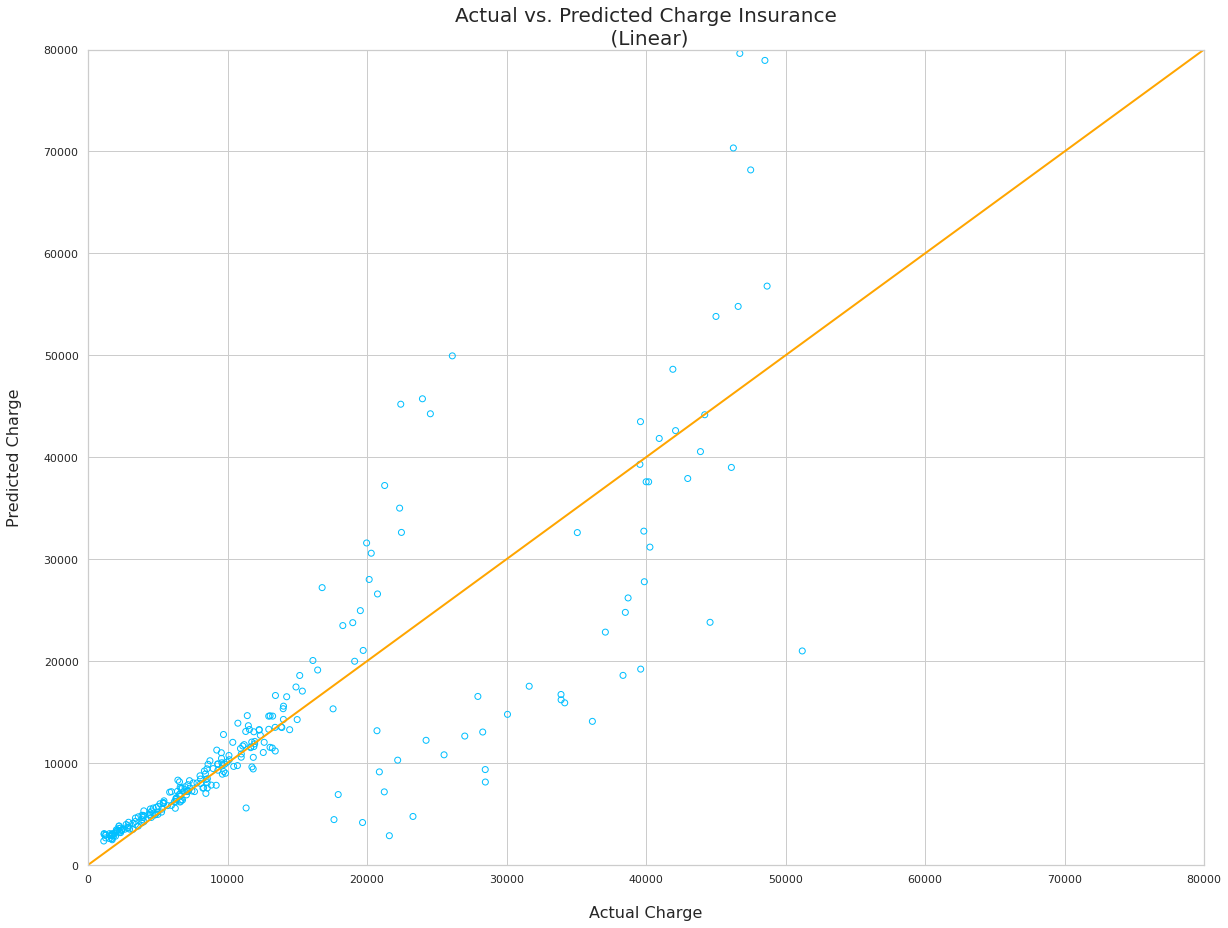

In [60]:
plt.figure()
plt.title("Actual vs. Predicted Charge Insurance\n (Linear)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lin),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 80000], [0, 80000], "orange", lw=2)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.xlabel("\nActual Charge", fontsize=16)
plt.ylabel("Predicted Charge\n", fontsize=16)
plt.show()

### <font color='forestgreen'>IV.2. Rigide Regression <font>

In [61]:
scores_ridge = cross_val_score(model_ridge, X_train, y_train,
                 cv=5)

print("Mean scores (Ridge Model):\n", np.mean(scores_ridge))
print("Standard deviation of scores (Ridge Model):\n", np.std(scores_ridge))

Mean scores (Ridge Model):
 0.7475463729020422
Standard deviation of scores (Ridge Model):
 0.03221143497913593


In [62]:
scores_ridge_mse = -1 * cross_val_score(model_ridge, X_train, y_train,
                      cv=5,
                      scoring='neg_mean_squared_error')

print("MSE scores (Ridge Model):\n", scores_ridge_mse)
print("Mean MSE scores:", scores_ridge_mse.mean())

MSE scores (Ridge Model):
 [0.18272698 0.20807439 0.26851746 0.20304754 0.18513998]
Mean MSE scores: 0.20950126842228226


In [63]:
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
print_score(y_test, y_pred_ridge, "Ridge")

**** Regressor: Ridge ****
R²: 0.8116589367904437
RMSE: 0.41010693956520466



In [64]:
# Save the model results into lists
model_list.append(model_ridge.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_ridge), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_ridge), 4))

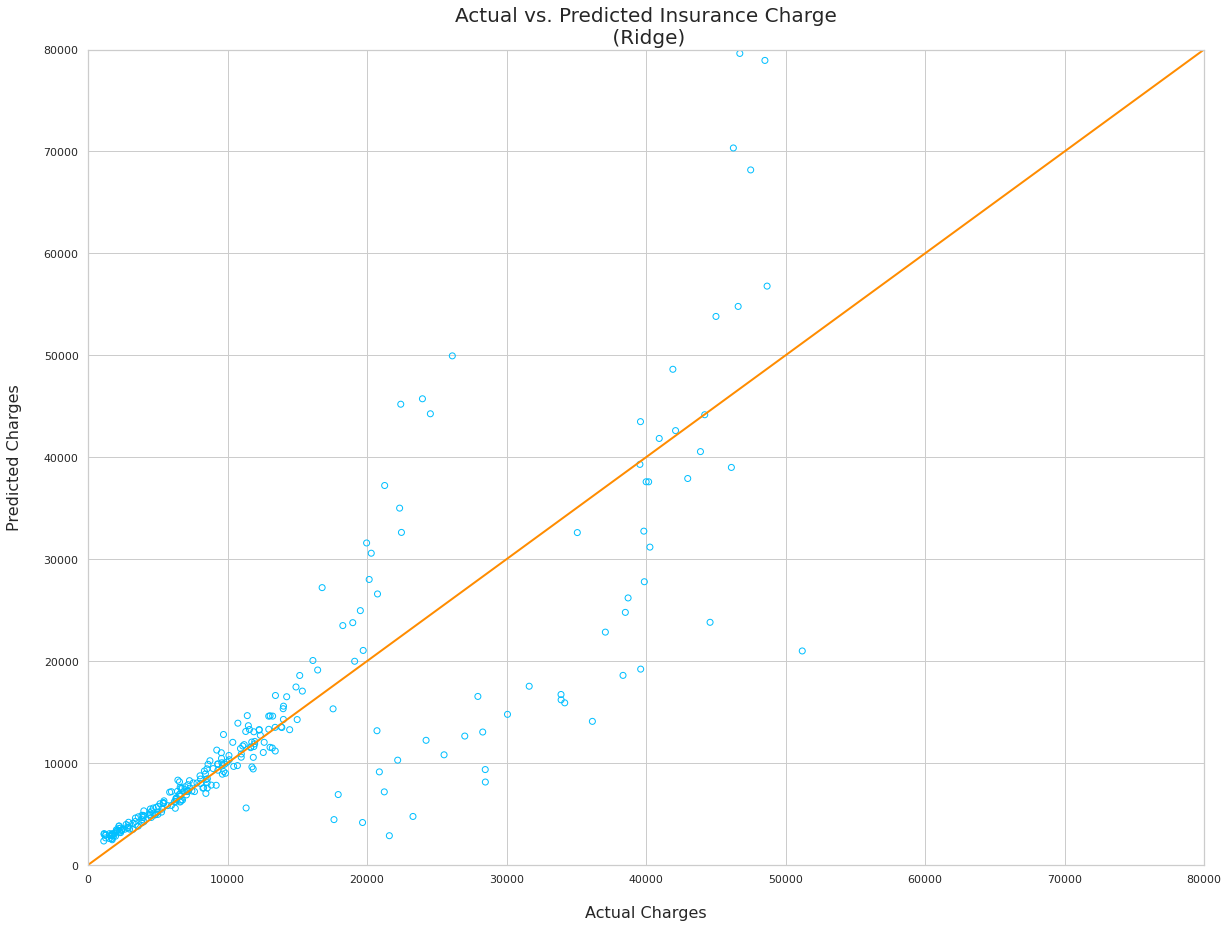

In [65]:
plt.figure()
plt.title("Actual vs. Predicted Insurance Charge\n (Ridge)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ridge),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 80000], [0, 80000], "darkorange", lw=2)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.xlabel("\nActual Charges", fontsize=16)
plt.ylabel("Predicted Charges\n", fontsize=16)
plt.show()

#### <font color='darkblue'>Hyperparamter Tuning (Ridge)</font>

In [66]:
# Define hyperparameters
alphas = np.linspace(0, 10, 100).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters: {'alpha': 6.8686868686868685}
Best R² (train): 0.746710795914798


In [67]:
model_ridge_opt = Ridge(alpha = ridge_cv.best_params_["alpha"])
model_ridge_opt.fit(X_train, y_train)
y_pred_ridge_opt = model_ridge_opt.predict(X_test)
print_score(y_test, y_pred_ridge_opt, "Ridge")

**** Regressor: Ridge ****
R²: 0.8111116514546894
RMSE: 0.4107023559262523



In [68]:
# Save the model results into lists
model_list.append(model_ridge_opt.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_ridge_opt), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_ridge_opt), 4))

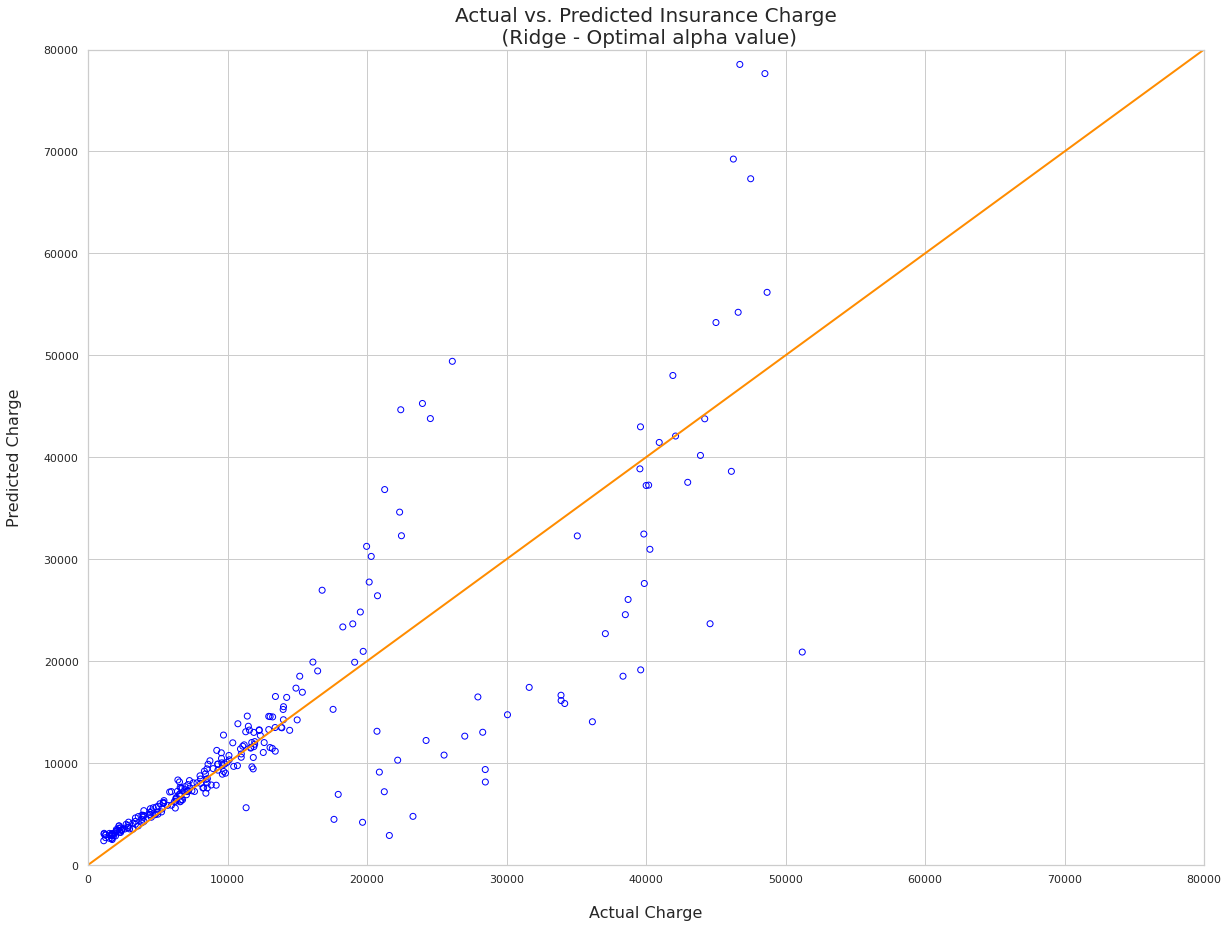

In [69]:
plt.figure()
plt.title("Actual vs. Predicted Insurance Charge\n (Ridge - Optimal alpha value)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ridge_opt),
            color="blue", marker="o", facecolors="none")
plt.plot([0, 80000], [0, 80000], "darkorange", lw=2)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.xlabel("\nActual Charge", fontsize=16)
plt.ylabel("Predicted Charge\n", fontsize=16)
plt.show()

### <font color='forestgreen'> IV.3. Lasso Regression <font>

In [70]:
scores_lasso = cross_val_score(model_lasso, X_train, y_train,
                                cv=5)

print("Mean scores (Lasso Model):\n", np.mean(scores_lasso))
print("Standard deviation of scores (Lasso Model):\n", np.std(scores_lasso))

Mean scores (Lasso Model):
 0.7475383055880309
Standard deviation of scores (Lasso Model):
 0.03231000999761629


In [71]:
scores_lasso_mse = -1 * cross_val_score(model_lasso, X_train, y_train,
                                      cv=5,
                                      scoring='neg_mean_squared_error')

print("MSE scores (Lasso Model):\n", scores_lasso_mse)
print("Mean MSE scores:", scores_lasso_mse.mean())

MSE scores (Lasso Model):
 [0.18263622 0.20866914 0.26854115 0.20236316 0.18529766]
Mean MSE scores: 0.20950146744998227


In [72]:
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
print_score(y_test, y_pred_lasso, "Lasso")

**** Regressor: Lasso ****
R²: 0.8118934202004993
RMSE: 0.4098515698084779



In [73]:
# Save the model results into lists
model_list.append(model_lasso.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_lasso), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_lasso), 4))

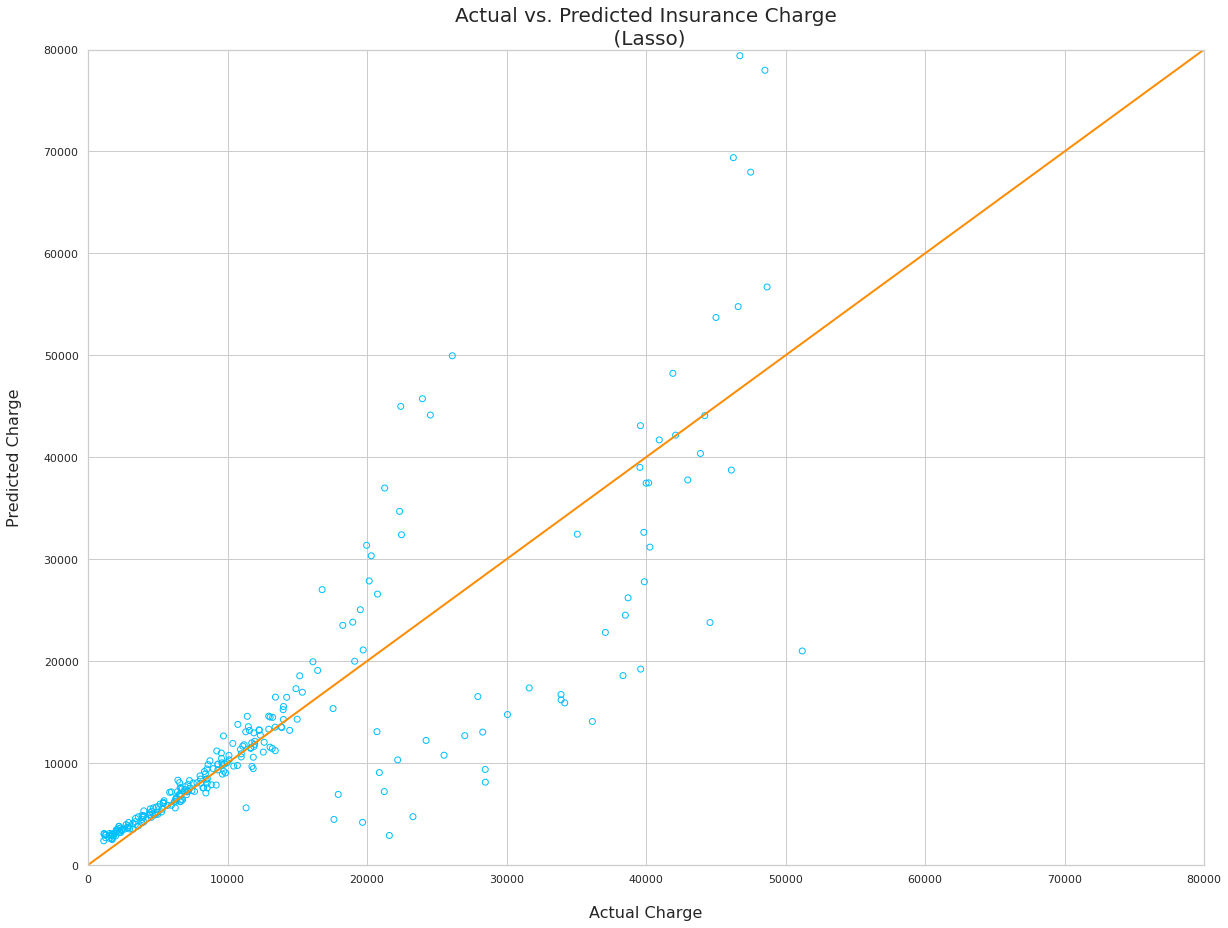

In [74]:
plt.figure()
plt.title("Actual vs. Predicted Insurance Charge\n (Lasso)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lasso),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 80000], [0, 80000], "darkorange", lw=2)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.xlabel("\nActual Charge", fontsize=16)
plt.ylabel("Predicted Charge\n", fontsize=16)
plt.show()

#### <font color='darkblue'>Hyperparamter Tuning (Lasso)</font>

In [75]:
# Define hyperparameters
alphas = np.logspace(-5, 5, 100).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lasso_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters: {'alpha': 0.0006579332246575682}
Best R² (train): 0.7466747751757408


In [76]:
model_lasso_opt = Lasso(alpha = lasso_cv.best_params_["alpha"])

model_lasso_opt.fit(X_train, y_train)
y_pred_lasso_opt = model_lasso_opt.predict(X_test)
print_score(y_test, y_pred_lasso_opt, "Lasso")

**** Regressor: Lasso ****
R²: 0.8118191233688374
RMSE: 0.4099325017645097



In [77]:
# Save the model results into lists
model_list.append(model_lasso_opt.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_lasso_opt), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_lasso_opt), 4))

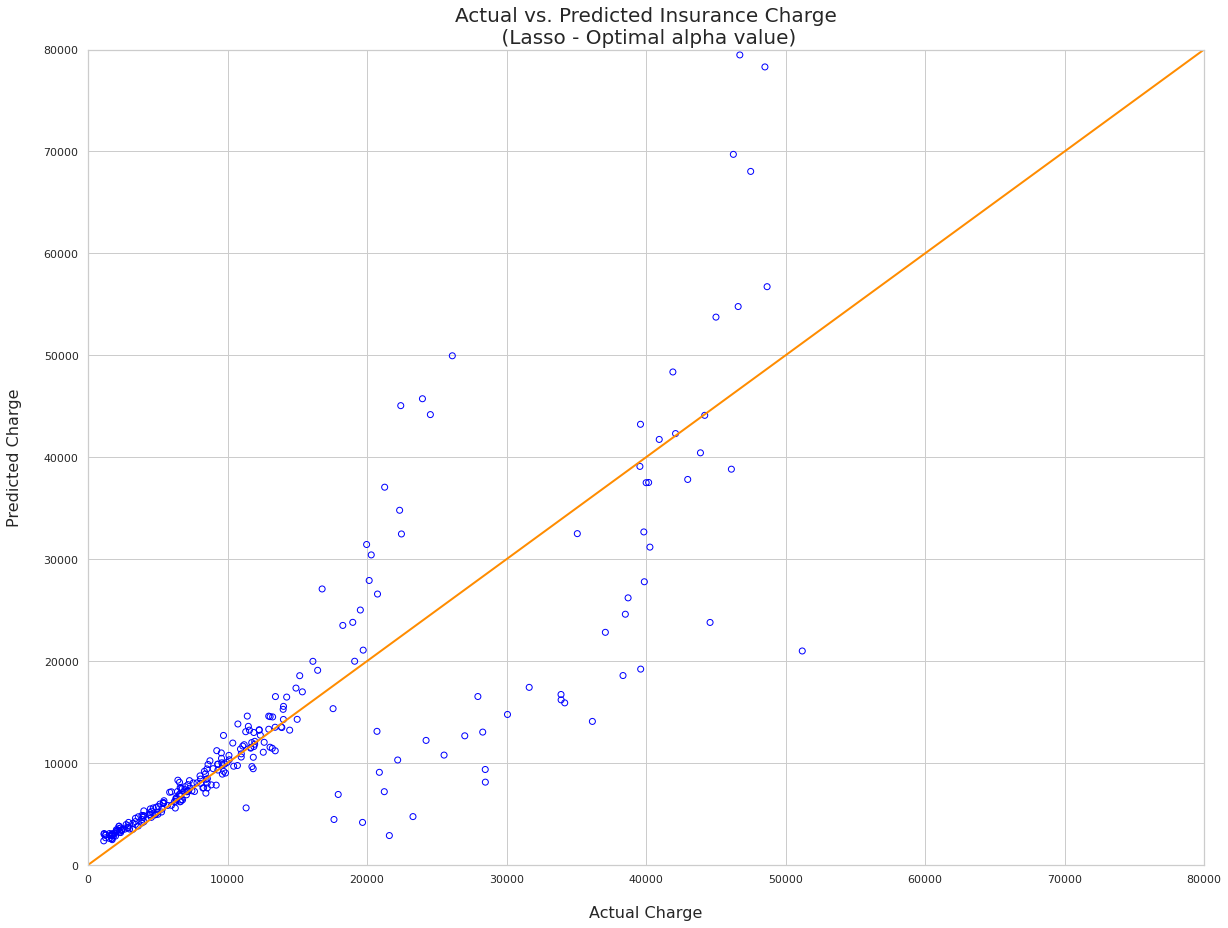

In [78]:
plt.figure()
plt.title("Actual vs. Predicted Insurance Charge\n (Lasso - Optimal alpha value)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lasso_opt),
            color="blue", marker="o", facecolors="none")
plt.plot([0, 80000], [0, 80000], "darkorange", lw=2)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.xlabel("\nActual Charge", fontsize=16)
plt.ylabel("Predicted Charge\n", fontsize=16)
plt.show()

### <font color='forestgreen'> IV.4. Random Forest Regressor <font> 

In [79]:
scores_ran = cross_val_score(model_ran, X_train, y_train,
                            cv=5)

print("Mean scores (Random Forest Model):\n", np.mean(scores_ran))
print("Standard deviation of scores (Random Forest Model):\n", np.std(scores_ran))

Mean scores (Random Forest Model):
 0.7913378382588071
Standard deviation of scores (Random Forest Model):
 0.03807277645265251


In [80]:
scores_ran_mse = -1 * cross_val_score(model_ran, X_train, y_train,
                                      cv=5,
                                      scoring='neg_mean_squared_error')

print("MSE scores (Random Forest Model):\n", scores_ran_mse)
print("Mean MSE scores:", scores_ran_mse.mean())

MSE scores (Random Forest Model):
 [0.12838259 0.16970767 0.20889833 0.22151054 0.14355163]
Mean MSE scores: 0.17441015284294298


In [81]:
model_ran.fit(X_train, y_train)
y_pred_ran = model_ran.predict(X_test)
print_score(y_test, y_pred_ran, "Random Forest")

**** Regressor: Random Forest ****
R²: 0.8694165093166836
RMSE: 0.3414827311383896



In [82]:
# Save the model results into lists
model_list.append(model_ran.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_ran), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_ran), 4))

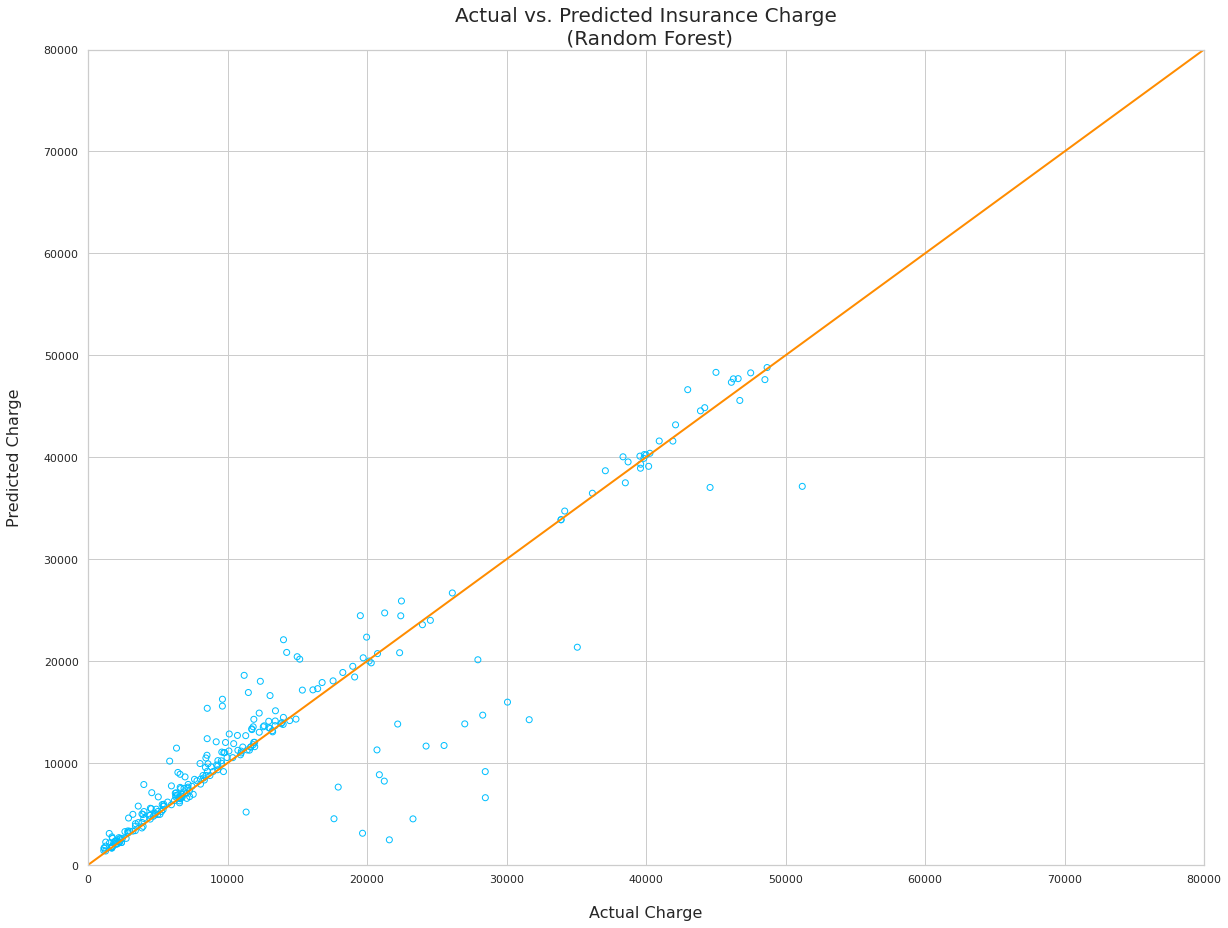

In [83]:
plt.figure()
plt.title("Actual vs. Predicted Insurance Charge\n (Random Forest)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ran),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 80000], [0, 80000], "darkorange", lw=2)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.xlabel("\nActual Charge", fontsize=16)
plt.ylabel("Predicted Charge\n", fontsize=16)
plt.show()

 ### <font color='forestgreen'> IV.5. XGBoost Regression <font> 

In [84]:
# Define hyperparameters
tuned_parameters_xgb = {"max_depth": [3],
                        "colsample_bytree": [0.3, 0.7],
                        "learning_rate": [0.01, 0.05, 0.1],
                        "n_estimators": [100, 500, 1000]}

# GridSearch
xgbr_cv = GridSearchCV(estimator=XGBRegressor(),
                       param_grid=tuned_parameters_xgb,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# fit the GridSearch on train set
xgbr_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {xgbr_cv.best_params_}\n")
print(f"Best R²: {xgbr_cv.best_score_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}

Best R²: 0.8173541977025277


In [85]:
model_xgb_opt = XGBRegressor(colsample_bytree = xgbr_cv.best_params_["colsample_bytree"],
                             learning_rate = xgbr_cv.best_params_["learning_rate"],
                             max_depth = xgbr_cv.best_params_["max_depth"],
                             n_estimators = xgbr_cv.best_params_["n_estimators"])

model_xgb_opt.fit(X_train, y_train)
y_pred_xgb_opt = model_xgb_opt.predict(X_test)
print_score(y_test, y_pred_xgb_opt, "XGBoost")

**** Regressor: XGBoost ****
R²: 0.875953074272292
RMSE: 0.3328262809186524



In [86]:
# Save the model results into lists
model_list.append(model_xgb_opt.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred_xgb_opt), 4))
rmse_list.append(round(rmse_score(y_test, y_pred_xgb_opt), 4))

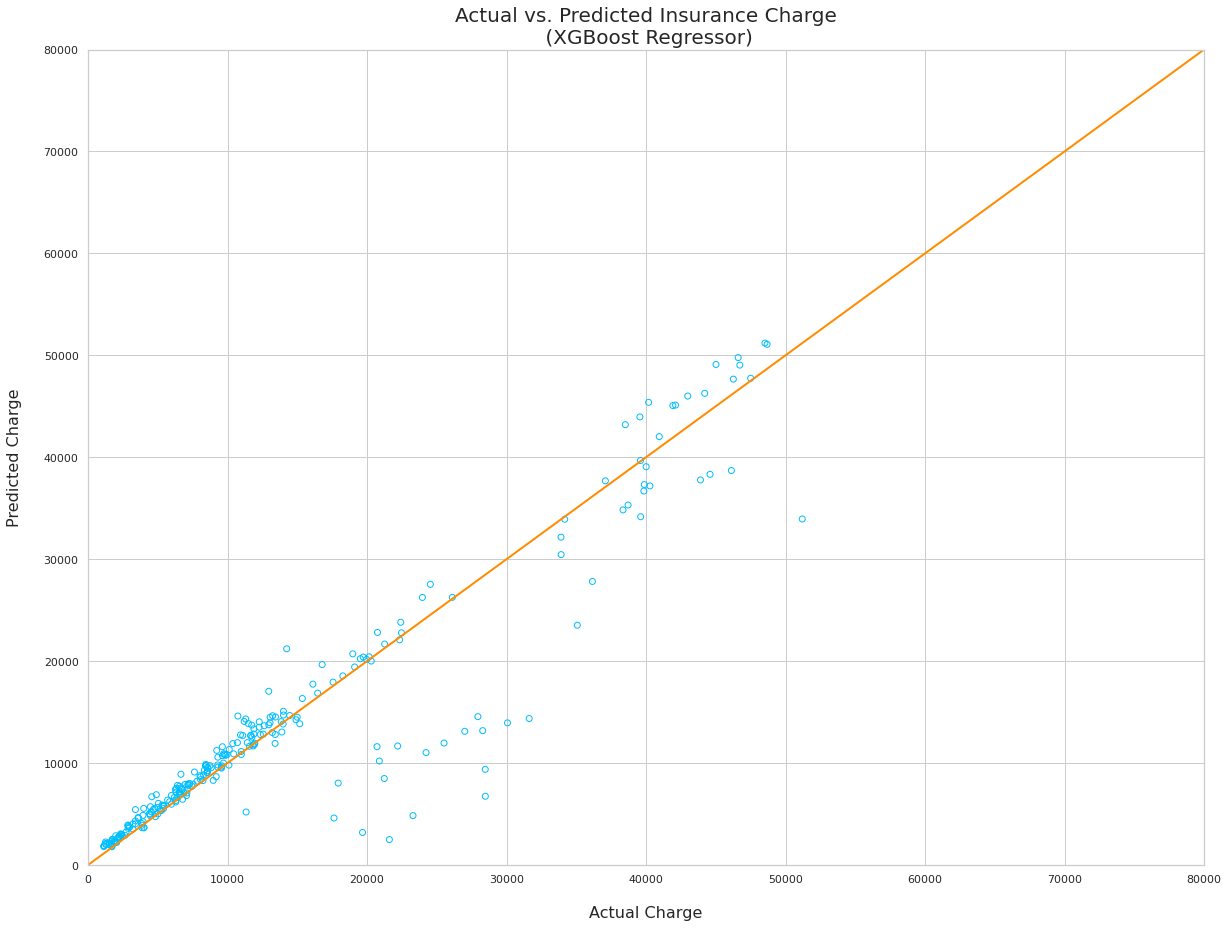

In [87]:
plt.figure()
plt.title("Actual vs. Predicted Insurance Charge\n (XGBoost Regressor)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_xgb_opt),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 80000], [0, 80000], "darkorange", lw=2)
plt.xlim(0, 80000)
plt.ylim(0, 80000)
plt.xlabel("\nActual Charge", fontsize=16)
plt.ylabel("Predicted Charge\n", fontsize=16)
plt.show()

In [88]:
# Create a table with pd.DataFrame
model_results = pd.DataFrame({"Model": model_list,
                              "R²": r2_list,
                              "RMSE": rmse_list})

model_results

,Model,R²,RMSE
0,LinearRegression,0.81,0.41
1,Ridge,0.81,0.41
2,Ridge,0.81,0.41
3,Lasso,0.81,0.41
4,Lasso,0.81,0.41
5,RandomForestRegressor,0.87,0.34
6,XGBRegressor,0.88,0.33


The results of this modeling are showing that the best performance in terms of R squared (R²) correspond to XGB Regressor. With regards to Residual Mean Square Error (RMSE), all these models are doing well except XGB Regressor which achieved a better performance. 

Thus, XGB Regressor will be chosen to make prediction on futur observations.

# <p style="background-color:orange;color:black;font-size:30px;text-align:center;border-radius:10px 10px;"> MCMC for Linear Regression Models </p> <font size="4">

<p style="background-color:;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> Simple Linear Regression <span style='font-size:28px; background-color:blue ;'>  </span></p>

This code performs a Bayesian linear regression analysis on our dataset, with the aim of predicting charges based on the body mass index (BMI) of patients.

The code first imports the necessary libraries: NumPy, Pandas, PyMC3, ArviZ, and StatsModels. It then defines a function linear_regression() that specifies a linear regression model in PyMC3, with normal priors for the intercept and slope (beta) parameters, and a normal likelihood. The function takes two arguments, x and y, which represent the predictor (BMI) and response (charges) variables, respectively.

Next, the code loads the medical charges data and splits it into training and test sets based on the BMI variable. Specifically, it selects the first 100 rows of data as the training set and the remaining rows as the test set. It then extracts the BMI and chargeslog columns from each set and assigns them to x_train, y_train, x_test, and y_test variables, respectively.

The linear_regression() function is then called with the x_train and y_train variables as arguments to fit the model and generate posterior samples for the intercept and beta parameters using Markov chain Monte Carlo (MCMC) sampling. The code then produces posterior trace and density plots using ArviZ.

The code then calculates the mean squared error (MSE) of the model's predictions on the test set. Specifically, it calculates the intercept and beta parameter means from the posterior samples, uses them to predict charges for each value of BMI in the test set, and calculates the MSE between the predicted and actual charges. The result is printed to the console.

Mean squared error: 0.87


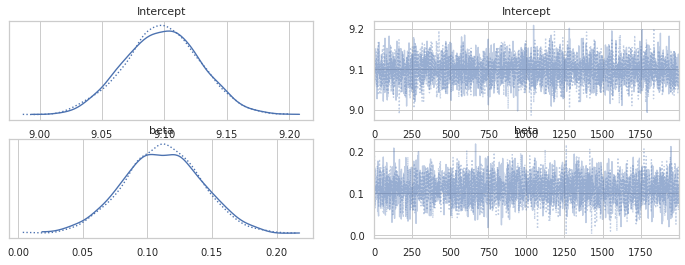

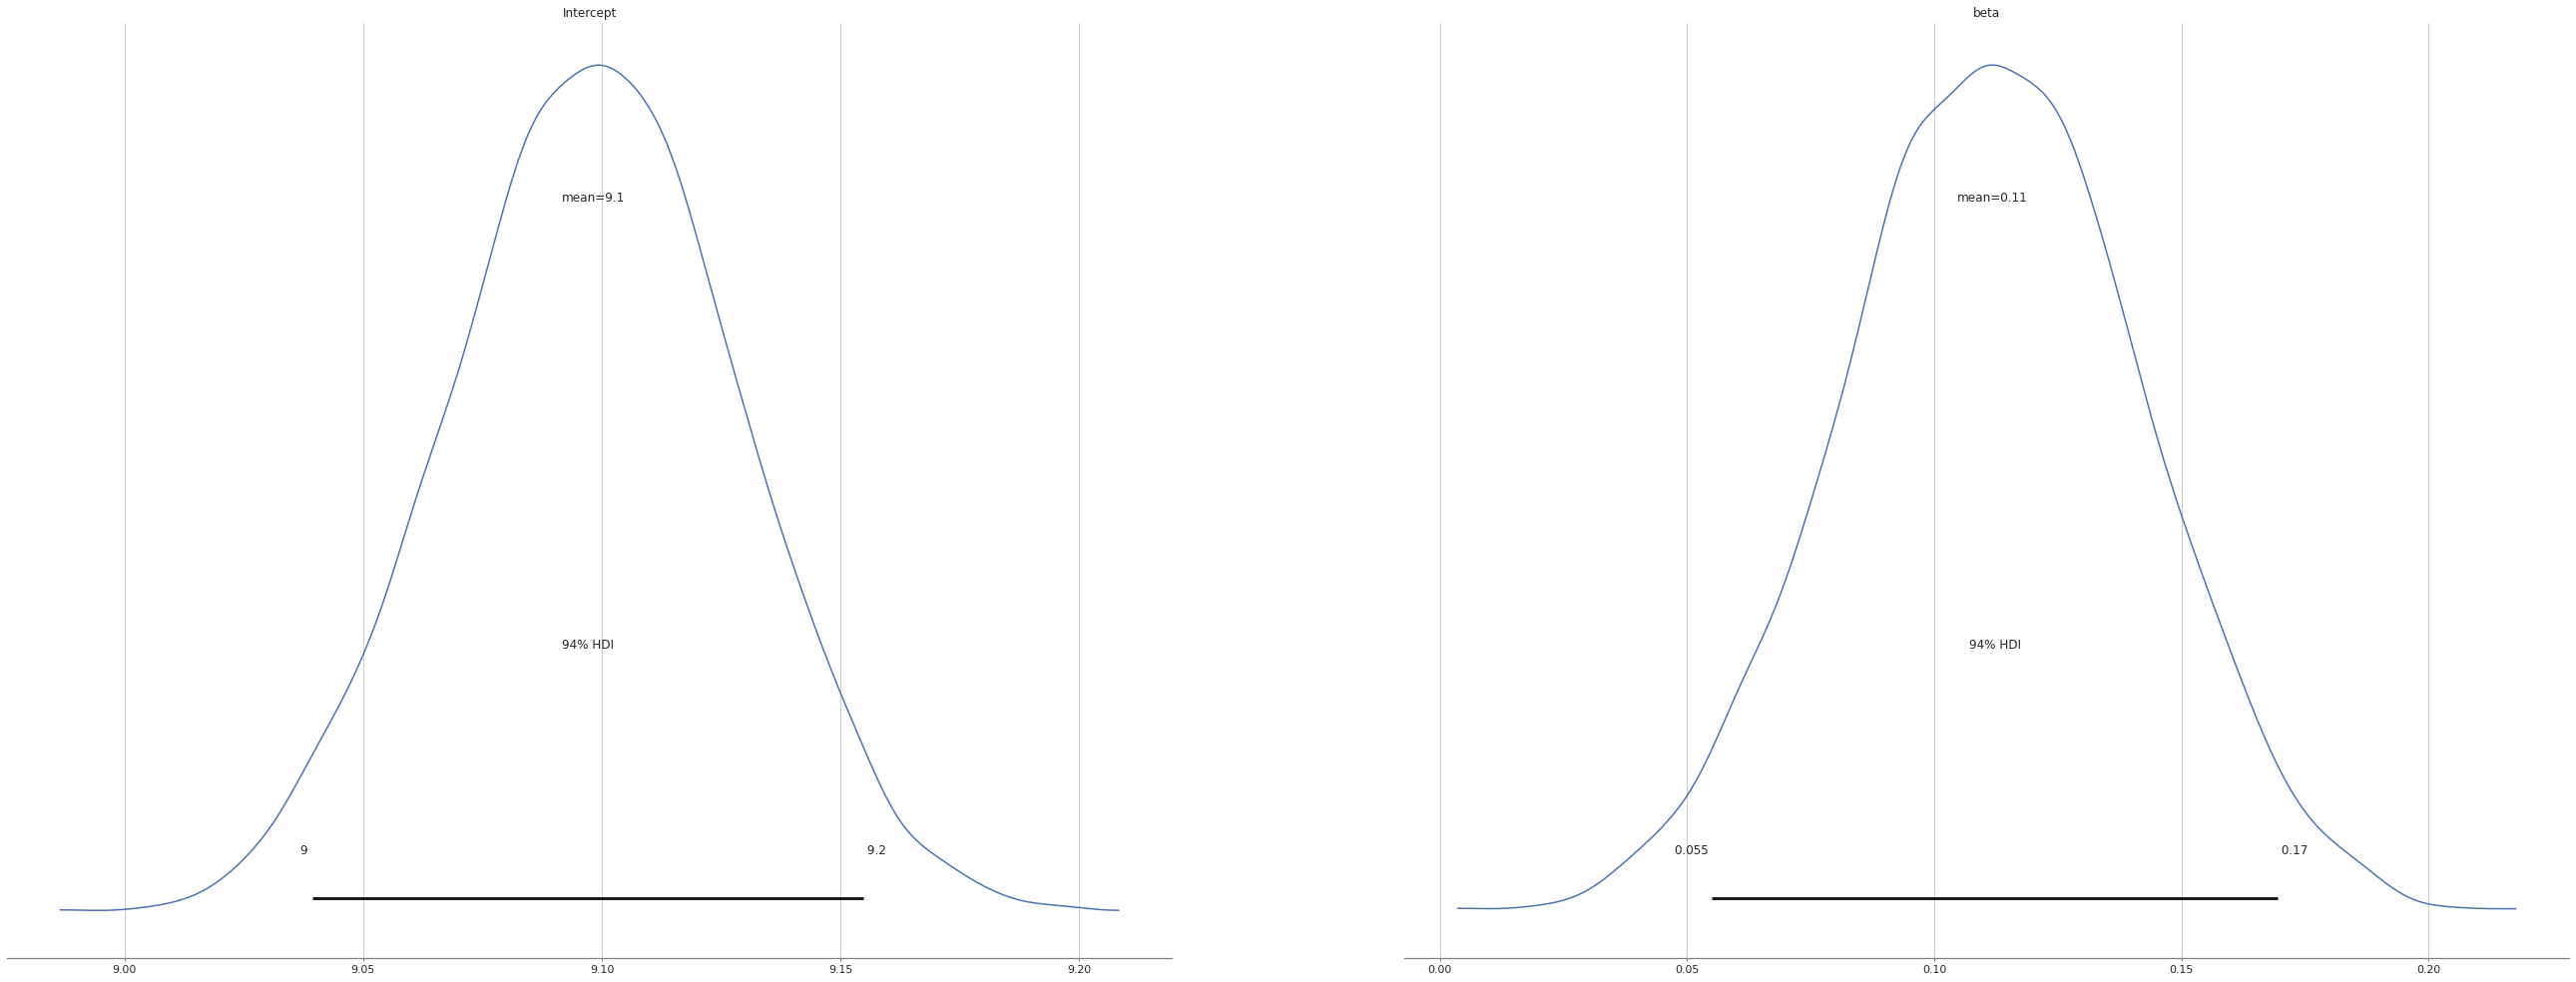

In [89]:
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
from scipy.optimize import minimize
import statsmodels.api as sm

# Define the model
def linear_regression(x, y):
    with pm.Model() as model:
        # Priors
        intercept = pm.Normal("Intercept", mu=0, sigma=10)
        beta = pm.Normal("beta", mu=0, sigma=10)

        # Likelihood
        likelihood = pm.Normal("y", mu=intercept + beta * x, sigma=1, observed=y)

        # Sampling
        trace = pm.sample(2000, chains=2, cores=2)
    return trace

# Split the data
x1_train = X_train['bmi']
y1_train = y_train['chargeslog']
x1_test = X_test['bmi']
y1_test = y_test['chargeslog']

# Fit the model
trace = linear_regression(x1_train, y1_train)

# Posterior plots
az.plot_trace(trace)
az.plot_posterior(trace)

# Predict on the test set
intercept = np.mean(trace["Intercept"])
beta = np.mean(trace["beta"])
y_pred = intercept + beta * x1_test

# Mean squared error
mse = np.mean((y_pred - y1_test) ** 2)
print(f"Mean squared error: {mse:.2f}")

### Interpretation:

* The trace plot on the left shows the sampled values of the parameters for each iteration of the MCMC algorithm, which are useful for diagnosing issues with the convergence of the algorithm. Ideally, the trace plots should look like a random walk, with no apparent trends or patterns. In this case, the trace plots show a good convergence, with the chains exploring the parameter space well.

* The posterior plot on the right shows the posterior distribution of the parameters, which is the distribution of values that the parameters could take, given the data and the model. The thicker line represents the median of the distribution, and the dashed lines represent the 95% credible interval, which is the range of values that contains 95% of the probability density. In this case, we can see that the intercept has a narrow distribution around 6, and the slope (beta) has a wider distribution around 0.2.

<p style="background-color:;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> Multiple Linear Regression <span style='font-size:28px; background-color:blue ;'>  </span></p>

Mean squared error: 0.17
Intercept    9.10
beta[0]      0.47
beta[1]      0.09
beta[2]      0.12
beta[3]     -0.03
beta[4]      0.63
beta[5]     -0.04
beta[6]     -0.09
beta[7]     -0.07
Name: mean, dtype: float64
Coefficients:
 [ 9.09830139  0.47102567  0.08317904  0.12436831 -0.03089513  0.62525571
 -0.04202382 -0.08527045 -0.07002095]


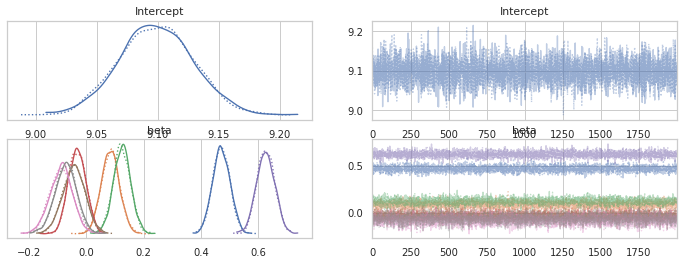

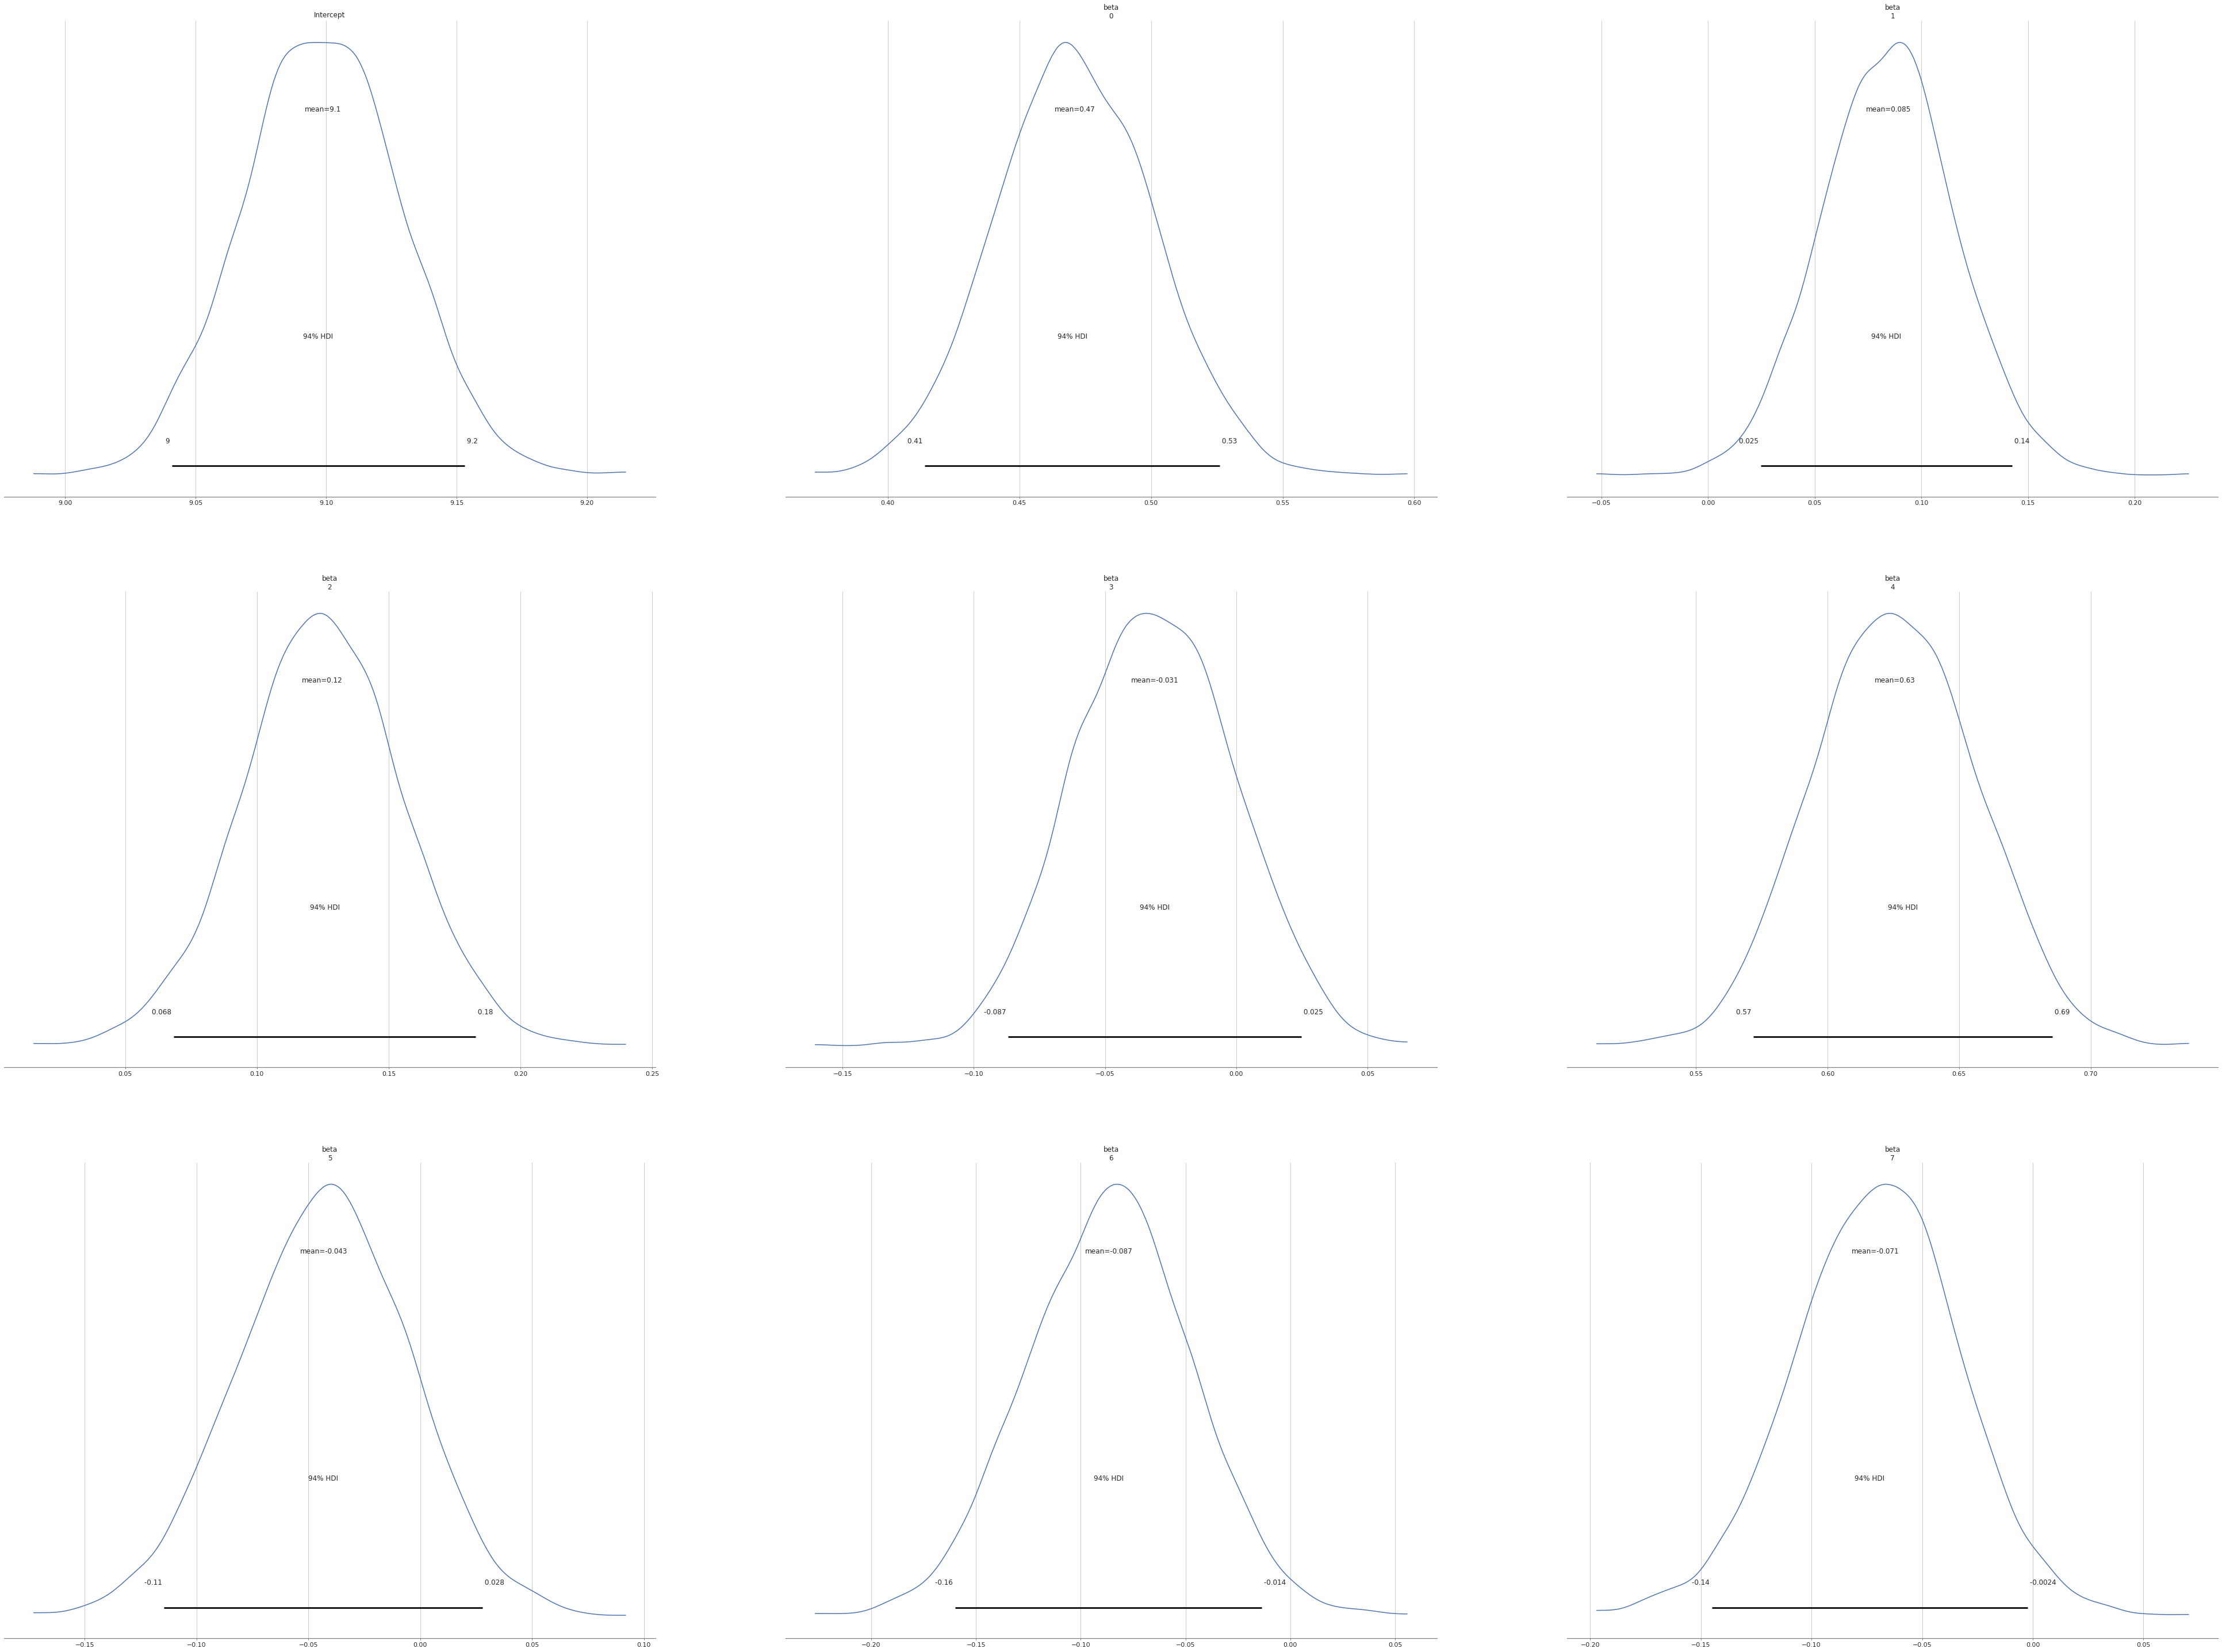

In [90]:
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az

# Define the model
def multiple_linear_regression(X, y):
    with pm.Model() as model:
        # Priors
        intercept = pm.Normal("Intercept", mu=0, sigma=10)
        beta = pm.Normal("beta", mu=0, sigma=10, shape=X.shape[1])

        # Likelihood
        likelihood = pm.Normal("y", mu=intercept + pm.math.dot(X, beta), sigma=1, observed=y)

        # Sampling
        trace = pm.sample(2000, chains=2, cores=2)
    return trace

# Split the data
x2_train = X_train
y2_train = y_train['chargeslog']
x2_test = X_test
y2_test = y_test['chargeslog']

# Fit the model
trace = multiple_linear_regression(x2_train, y2_train)

# Posterior plots
az.plot_trace(trace)
az.plot_posterior(trace)

# Predict on the test set
intercept = np.mean(trace["Intercept"])
beta = np.mean(trace["beta"], axis=0)
y_pred = intercept + np.dot(x2_test, beta)

# Mean squared error
mse = np.mean((y_pred - y2_test) ** 2)
print(f"Mean squared error: {mse:.2f}")

# Display the coefficients the Bayesian Model
print(pm.summary(trace)["mean"])

# Display the coefficients of the Least Squares Model
print("Coefficients:\n", coef_with_intercept)

### Interpretation:

A smaller mean squared error (MSE) suggests that the model has a better fit to the data. 

Therefore, we can conclude that the multiple linear regression model has a better fit to the data compared to the simple linear regression model. 

In addition, still in terms of the mean squared error, the Bayesian linear regression model does a better job than the least squared linear regression model. 

<p style="background-color:;color:black;font-size:20px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid black;"> Least Squares versus Bayesian Linear Regression <span style='font-size:28px; background-color:blue ;'>  </span></p>

This code will produce a bar plot that shows the coefficients of the Bayesian and least squared models side by side. The x-axis represents the different coefficients, and the y-axis represents their respective values.

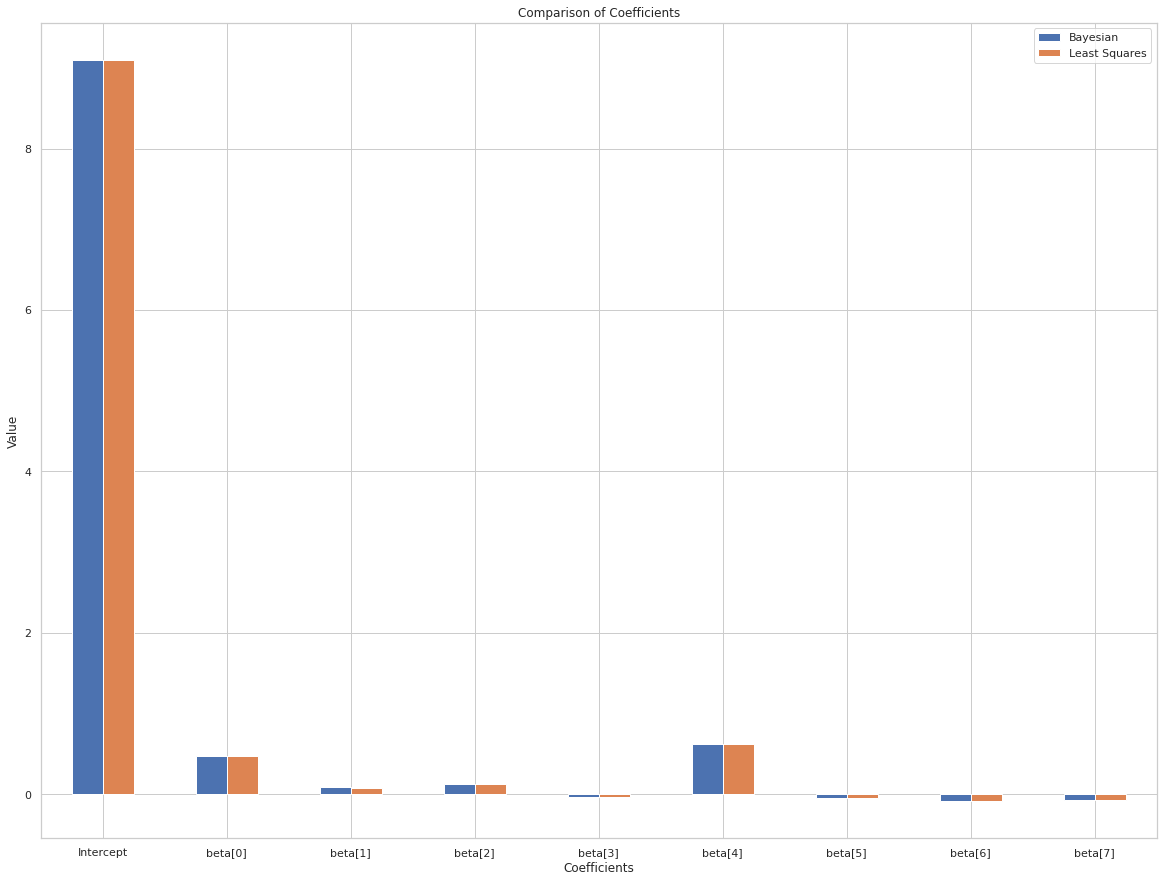

In [91]:
# Get the coefficients
bayesian_coefs = pm.summary(trace)["mean"]
ls_coefs = coef_with_intercept

# Combine the coefficients into a DataFrame
coefs_df = pd.DataFrame({"Bayesian": bayesian_coefs, "Least Squares": ls_coefs})

# Create the bar plot
sns.set(style="whitegrid")
ax = coefs_df.plot(kind="bar", rot=0)
ax.set_xlabel("Coefficients")
ax.set_ylabel("Value")
ax.set_title("Comparison of Coefficients")
plt.show()

### Conclusion:

The Bayesian linear regression may have a smaller mean squared error compared to the least squares linear regression due to the uncertainty estimates provided by the Bayesian model. In Bayesian linear regression, we estimate the posterior distribution of the model parameters given the data, which allows us to obtain a range of plausible values for the parameters, instead of a single point estimate as in least squares regression.

This uncertainty estimate can be particularly helpful in situations where we have limited data or when the data is noisy or has outliers. The uncertainty estimates can help to regularize the model and reduce overfitting. Additionally, Bayesian models allow for the incorporation of prior knowledge, which can be useful in situations where we have some prior knowledge about the relationship between the variables.

Therefore, the Bayesian approach may provide a more robust estimate of the parameters, resulting in better predictions and a smaller mean squared error compared to the least squares approach.